In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import os
import random
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from tqdm import tqdm
from collections import defaultdict, Counter
import seaborn as sns
import os
import time
import seaborn as sns

In [27]:
# Set random seed for reproducibility
random_state = 42
random.seed(random_state)

In [28]:
path='/home/jupyter/Patch_extraction/'
base = '/home/jupyter/Patch_extraction/'

In [29]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [30]:
def patch_selection(ids, class_index):
    patch_paths = []
    labels = []
    slide_ids = []

    for slide_id in tqdm(ids):
        try:
            files1 = os.listdir(os.path.join(base, str(class_index), slide_id))
            
           # Randomly select 100 images if there are more than 100
            # if len(files1) > 100:
            #     selected_files = random.sample(files1, 100)
            # else:
            selected_files = files1  # Optionally limit the number of files selected

            for x in selected_files:
                patch_paths.append(os.path.join(base, str(class_index), slide_id, x))
                labels.append(class_index)  # Append the class label based on the folder name
                slide_ids.append(slide_id)  # Append the slide ID
        except FileNotFoundError:
            pass

    return patch_paths, labels, slide_ids

In [7]:
def patch_selection_remaining(ids, class_index):
    patch_paths = []
    labels = []
    slide_ids = []

    for slide_id in tqdm(ids):
        try:
            files1 = os.listdir(os.path.join(base, str(class_index), slide_id))
            
           # Randomly select 100 images if there are more than 100
            if len(files1) > 100:
                selected_files = random.sample(files1, 100)
            else:
                selected_files = files1  # Optionally limit the number of files selected

            for x in selected_files:
                patch_paths.append(os.path.join(base, str(class_index), slide_id, x))
                labels.append(class_index)  # Append the class label based on the folder name
                slide_ids.append(slide_id)  # Append the slide ID
        except FileNotFoundError:
            pass

    return patch_paths, labels, slide_ids

In [8]:
# Set random seed for reproducibility
random_state = 42
random.seed(random_state)

train_patch_ids = []
train_labels = []
train_slide_ids = []

val_patch_ids = []
val_labels = []
val_slide_ids = []

test_patch_ids = []
test_labels = []
test_slide_ids = []

remaining_patch_ids = []
remaining_labels = []
remaining_slide_ids = []


for i in range(0, 15):
    # List all file IDs in the directory
    ids = os.listdir(base + '/' + str(i) + '/')
    ids_1=ids
    
    # Ensure at most 10 slides are selected
    if len(ids) > 15:
        ids = random.sample(ids, 15)

    # Split the IDs into training, validation, and test sets
    train_ids_1, test_ids = train_test_split(ids, test_size=0.30, random_state=42)
    train_ids, val_ids = train_test_split(train_ids_1, test_size=0.20, random_state=42)
    
    # Get remaining slides
    selected_ids = set(train_ids + val_ids)
    remaining_ids = [id_ for id_ in ids_1 if id_ not in selected_ids]
    
    # Assuming patch_selection function selects patches from given ids and class index
    train_patch_id, train_label, train_slide_id = patch_selection(train_ids, i)
    val_patch_id, val_label, val_slide_id = patch_selection(val_ids, i)
    test_patch_id, test_label, test_slide_id = patch_selection(test_ids, i)
    remaining_patch_id, remaining_label, remaining_slide_id = patch_selection_remaining(remaining_ids, i)
    
    train_patch_ids.extend(train_patch_id)
    train_labels.extend(train_label)
    train_slide_ids.extend(train_slide_id)
    
    val_patch_ids.extend(val_patch_id)
    val_labels.extend(val_label)
    val_slide_ids.extend(val_slide_id)
    
    test_patch_ids.extend(test_patch_id)
    test_labels.extend(test_label)
    test_slide_ids.extend(test_slide_id)
    
    remaining_patch_ids.extend(remaining_patch_id)
    remaining_labels.extend(remaining_label)
    remaining_slide_ids.extend(remaining_slide_id)

       
# Print some results to verify
print(f"Total training patches: {len(train_patch_ids)}")
print(f"Total validation patches: {len(val_patch_ids)}")
print(f"Total testing patches: {len(test_patch_ids)}")
print(f"Total remaining patches: {len(remaining_patch_ids)}")

100%|██████████| 4/4 [00:00<00:00, 799.18it/s]

Total training patches: 301376
Total validation patches: 79799
Total testing patches: 184886
Total remaining patches: 83923


In [ ]:
import os
import random
import json
import pandas as pd
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
random_state = 42
random.seed(random_state)

train_patch_ids = []
train_labels = []
train_slide_ids = []

val_patch_ids = []
val_labels = []
val_slide_ids = []

test_patch_ids = []
test_labels = []
test_slide_ids = []

remaining_patch_ids = []
remaining_labels = []
remaining_slide_ids = []

# Lists to store slide IDs with their class labels
train_slide_info = []
val_slide_info = []
test_slide_info = []
remaining_slide_info = []

for i in range(0, 15):
    # List all file IDs in the directory
    ids = os.listdir(base + '/' + str(i) + '/')
    ids_1 = ids
    
    # Ensure at most 10 slides are selected
    if len(ids) > 15:
        ids = random.sample(ids, 15)

    # Split the IDs into training, validation, and test sets
    train_ids_1, test_ids = train_test_split(ids, test_size=0.30, random_state=42)
    train_ids, val_ids = train_test_split(train_ids_1, test_size=0.20, random_state=42)
    
    # Get remaining slides
    selected_ids = set(train_ids + val_ids)
    remaining_ids = [id_ for id_ in ids_1 if id_ not in selected_ids]
    
    # Assuming patch_selection function selects patches from given ids and class index
    train_patch_id, train_label, train_slide_id = patch_selection(train_ids, i)
    val_patch_id, val_label, val_slide_id = patch_selection(val_ids, i)
    test_patch_id, test_label, test_slide_id = patch_selection(test_ids, i)
    remaining_patch_id, remaining_label, remaining_slide_id = patch_selection_remaining(remaining_ids, i)
    
    train_patch_ids.extend(train_patch_id)
    train_labels.extend(train_label)
    train_slide_ids.extend(train_slide_id)
    
    val_patch_ids.extend(val_patch_id)
    val_labels.extend(val_label)
    val_slide_ids.extend(val_slide_id)
    
    test_patch_ids.extend(test_patch_id)
    test_labels.extend(test_label)
    test_slide_ids.extend(test_slide_id)
    
    remaining_patch_ids.extend(remaining_patch_id)
    remaining_labels.extend(remaining_label)
    remaining_slide_ids.extend(remaining_slide_id)

    # Add slide IDs and their class labels to the respective lists
    train_slide_info.extend([(id_, i) for id_ in train_ids])
    val_slide_info.extend([(id_, i) for id_ in val_ids])
    test_slide_info.extend([(id_, i) for id_ in test_ids])
    remaining_slide_info.extend([(id_, i) for id_ in remaining_ids])

# Convert to DataFrame
train_df = pd.DataFrame(train_slide_info, columns=['Slide ID', 'Class'])
val_df = pd.DataFrame(val_slide_info, columns=['Slide ID', 'Class'])
test_df = pd.DataFrame(test_slide_info, columns=['Slide ID', 'Class'])
remaining_df = pd.DataFrame(remaining_slide_info, columns=['Slide ID', 'Class'])

# Save to CSV files
train_df.to_csv('train_slide_ids.csv', index=False)
val_df.to_csv('val_slide_ids.csv', index=False)
test_df.to_csv('test_slide_ids.csv', index=False)
remaining_df.to_csv('remaining_slide_ids.csv', index=False)

# Save to JSON files
train_df.to_json('train_slide_ids.json', orient='records', lines=True)
val_df.to_json('val_slide_ids.json', orient='records', lines=True)
test_df.to_json('test_slide_ids.json', orient='records', lines=True)
remaining_df.to_json('remaining_slide_ids.json', orient='records', lines=True)

# Print some results to verify
print(f"Total training patches: {len(train_patch_ids)}")
print(f"Total validation patches: {len(val_patch_ids)}")
print(f"Total testing patches: {len(test_patch_ids)}")
print(f"Total remaining patches: {len(remaining_patch_ids)}")


In [9]:
# # Define transformations
# transform = transforms.ToTensor()


# # Function to calculate mean and std
# def calculate_mean_std(image_paths):
#     mean = np.zeros(3)
#     std = np.zeros(3)
#     num_images = len(image_paths)

#     for img_path in image_paths:
#         image = Image.open(img_path)
#         tensor = transform(image)
#         mean += tensor.mean([1, 2]).numpy()
#         std += tensor.std([1, 2]).numpy()

#     mean /= num_images
#     std /= num_images

#     return mean, std


# # Combine all image paths
# all_image_paths = train_patch_ids + val_patch_ids + test_patch_ids

# # Calculate mean and std
# mean, std = calculate_mean_std(all_image_paths)

# print(f'Mean: {mean}')
# print(f'Std: {std}')

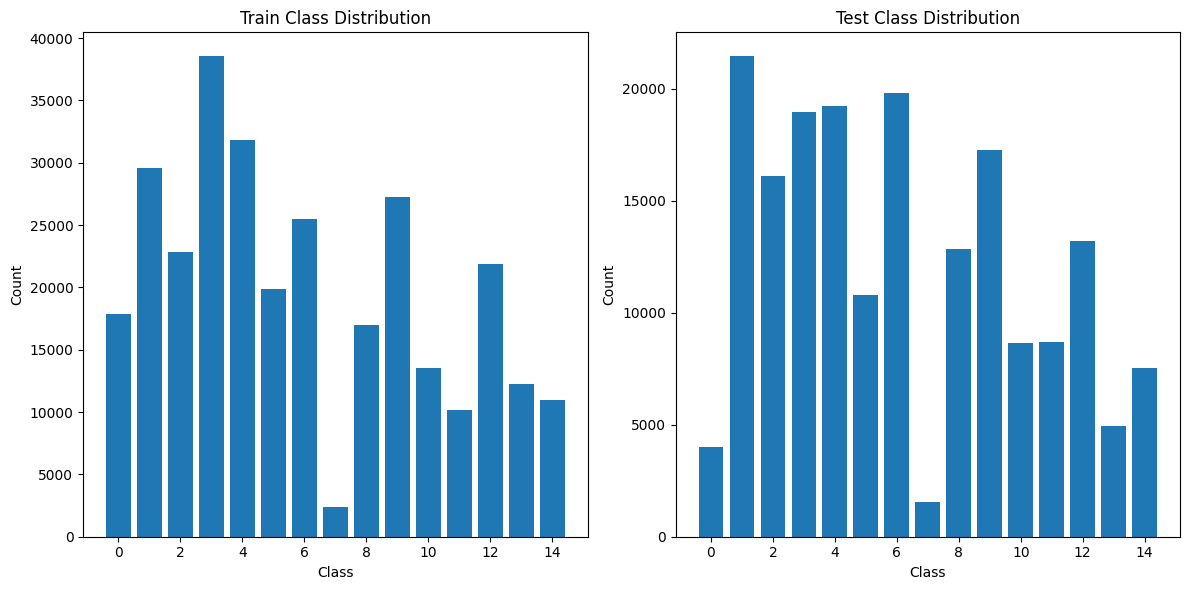

Train class distribution: [17856. 29546. 22858. 38534. 31848. 19839. 25455.  2406. 16952. 27267.
 13530. 10179. 21864. 12248. 10994.]
Test class distribution: [ 4013. 21435. 16074. 18933. 19231. 10772. 19792.  1536. 12852. 17250.
  8642.  8676. 13205.  4951.  7524.]


In [10]:
def get_class_distribution_from_filenames(filenames, custom_classes):
    class_counts = np.zeros(len(custom_classes))
    class_map = {cls: idx for idx, cls in enumerate(custom_classes)}
    
    for filename in filenames:
        # Extract class label from the directory name
        class_label = int(os.path.basename(os.path.dirname(os.path.dirname(filename))))
        if class_label in class_map:
            class_counts[class_map[class_label]] += 1
    
    return class_counts

# Define your custom range of class labels
custom_range = list(range(0, 15))

# Assuming train_patch_ids and test_patch_ids are lists of image paths for training and testing
train_class_distribution = get_class_distribution_from_filenames(train_patch_ids, custom_range)
test_class_distribution = get_class_distribution_from_filenames(test_patch_ids, custom_range)

# Plotting class distributions
classes = np.array(custom_range)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(classes, train_class_distribution)
plt.title('Train Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(classes, test_class_distribution)

plt.title('Test Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print distributions as arrays
print("Train class distribution:", train_class_distribution)
print("Test class distribution:", test_class_distribution)


In [11]:

# Assuming train_patch_ids, train_labels, train_slide_ids, test_patch_ids, test_labels, and test_slide_ids are lists of image paths, labels, and slide IDs for training and testing
# Create dataset and dataloader
class TissueDataset(Dataset):
    def __init__(self, image_paths, labels, slide_ids, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.slide_ids = slide_ids
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        slide_id = self.slide_ids[idx]

        if self.transform:
            image = self.transform(image)

        return image, label, slide_id
 


In [12]:
# Define the data augmentation and normalization
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor()
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


# Create dataset and dataloader
train_dataset = TissueDataset(train_patch_ids, train_labels, train_slide_ids, transform=train_transform)
val_dataset = TissueDataset(val_patch_ids, val_labels, val_slide_ids, transform=val_transform)
test_dataset = TissueDataset(test_patch_ids, test_labels, test_slide_ids, transform=val_transform)
remaining_dataset = TissueDataset(remaining_patch_ids, remaining_labels, remaining_slide_ids, transform=val_transform)


train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4)
remaining_loader = DataLoader(remaining_dataset, batch_size=128, shuffle=False, num_workers=4)



In [13]:
print(len(train_loader))

2355


In [14]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [15]:
def training(train_loader, val_loader, learn_rate, EPOCHS, model, filename):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Use DataParallel for multi-GPU support
    if torch.cuda.device_count() > 1:
        print(f"Using {torch.cuda.device_count()} GPUs")
        model = nn.DataParallel(model)

    model.to(device)

    # Defining loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learn_rate)

    best_val_loss = float('inf')
    patience = 10
    patience_counter = 0

    for epoch in range(EPOCHS):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        epoch_start_time = time.time()

        # Initialize tqdm progress bar
        train_loader_tqdm = tqdm(train_loader, desc=f'Epoch {epoch+1}/{EPOCHS}', unit='batch')

        for batch_idx, (inputs, labels, slide_ids) in enumerate(train_loader_tqdm):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            batch_loss = running_loss / ((batch_idx + 1) * train_loader.batch_size)
            batch_acc = running_corrects.double() / ((batch_idx + 1) * train_loader.batch_size)

            # Calculate and display ETA
            batch_end_time = time.time()
            batch_duration = batch_end_time - epoch_start_time
            eta = batch_duration * (len(train_loader) - batch_idx - 1) / (batch_idx + 1)

            # Update tqdm progress bar with current loss, accuracy, and ETA
            train_loader_tqdm.set_postfix(
                loss=batch_loss,
                accuracy=batch_acc.item(),
                ETA=f"{eta/60:.2f} min"
            )

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}")

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels, slide_ids in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                _, preds = torch.max(outputs, 1)
                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f"Validation Loss: {val_loss:.4f}, Validation Acc: {val_acc:.4f}")

        # Save the model at the end of each epoch if validation loss improves
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break

    return model

In [16]:
# class ClassificationModel(nn.Module):
#     def __init__(self, num_classes=17):
#         super(ClassificationModel, self).__init__()
#         base_model = models.efficientnet_b0(pretrained=True)
#         self.features = nn.Sequential(*list(base_model.children())[:-1])  # Exclude the classifier layer
#         self.classifier = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(base_model.classifier[1].in_features, 2048),
#             nn.ReLU(),
#             nn.BatchNorm1d(2048),
#             nn.Dropout(0.5),
#             nn.Linear(2048, num_classes)
#         )

#     def forward(self, x):
#         x = self.features(x)
#         x = self.classifier(x)
#         return x

# def freezing_layers(model):
#     for param in model.features.parameters():
#         param.requires_grad = False

In [17]:
# class ClassificationModel(nn.Module):
#     def __init__(self, num_classes=15):
#         super(ClassificationModel, self).__init__()
#         base_model = models.efficientnet_b0(pretrained=True)
#         self.batch_norm = nn.BatchNorm2d(3, affine=False)  # Assuming the input has 3 channels (RGB)
#         self.features = nn.Sequential(*list(base_model.children())[:-1])  # Exclude the classifier layer
#         self.classifier = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(base_model.classifier[1].in_features, 2048),
#             nn.ReLU(),
#             nn.BatchNorm1d(2048),
#             nn.Dropout(0.5),
#             nn.Linear(2048, num_classes)
#         )

#     def forward(self, x):
#         x = self.batch_norm(x)  # Apply batch normalization to the input
#         x = self.features(x)
#         x = self.classifier(x)
#         return x

# def freezing_layers(model):
#     for param in model.features.parameters():
#         param.requires_grad = False


In [24]:
# !pip install transformers


import torch
import torch.nn as nn
from torchvision import models
from transformers import ViTModel, ViTConfig

class ClassificationModel(nn.Module):
    def __init__(self, num_classes=15):
        super(ClassificationModel, self).__init__()
        
        # Load a pretrained Vision Transformer model
        config = ViTConfig.from_pretrained('google/vit-base-patch16-224')
        self.vit = ViTModel.from_pretrained('google/vit-base-patch16-224', config=config)
        self.batch_norm = nn.BatchNorm2d(3, affine=False)  # Assuming the input has 3 channels (RGB)

        
        # Classifier layer
        self.classifier = nn.Sequential(
            nn.Linear(config.hidden_size, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.batch_norm(x)  # Apply batch normalization to the input
        # Pass the input through the Vision Transformer
        outputs = self.vit(x)
        pooled_output = outputs.pooler_output  # Use the pooled output from the Vision Transformer
        
        # Pass the pooled output through the classifier
        x = self.classifier(pooled_output)
        return x

def freezing_layers(model):
    for param in model.vit.parameters():
        param.requires_grad = False

In [ ]:
num_classes=15

model = ClassificationModel(num_classes=15)
freezing_layers(model)

learn_rate = 0.001
EPOCHS = 2
filename = 'ViT_15_class.pth'

model = training(train_loader, val_loader, learn_rate, EPOCHS, model, filename)



Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/2: 100%|██████████| 2355/2355 [12:02:55<00:00, 18.42s/batch, ETA=0.00 min, accuracy=0.716, loss=0.93]     

Epoch 1/2, Loss: 0.9302, Acc: 0.7161


Validation Loss: 1.8759, Validation Acc: 0.5461


Epoch 2/2: 100%|██████████| 2355/2355 [12:36:35<00:00, 19.28s/batch, ETA=0.00 min, accuracy=0.756, loss=0.785]    

Epoch 2/2, Loss: 0.7851, Acc: 0.7558


In [ ]:
# Load the best model for evaluation
filename = 'ViT_15_class.pth'

model = ClassificationModel(num_classes=15)

# Use DataParallel for multi-GPU support
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs")
    model = nn.DataParallel(model)

    
model.load_state_dict(torch.load(filename))


# Use DataParallel for multi-GPU support
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs")
    model = nn.DataParallel(model)


model.eval()


test_loss = 0.0
test_corrects = 0
all_preds = []
all_labels = []
slide_predictions = defaultdict(list)
slide_labels = {}

# Evaluation loop
with torch.no_grad():
    for inputs, labels, slide_ids in tqdm(test_loader, desc="Evaluating", unit="batch"):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = nn.CrossEntropyLoss()(outputs, labels)

        _, preds = torch.max(outputs, 1)
        test_loss += loss.item() * inputs.size(0)
        test_corrects += torch.sum(preds == labels.data)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Store predictions for each slide
        for slide_id, pred, label in zip(slide_ids, preds.cpu().numpy(), labels.cpu().numpy()):
            slide_predictions[slide_id].append(pred)
            slide_labels[slide_id] = label

        # Calculate current accuracy
        current_acc = test_corrects.double() / len(all_labels)

        # Update the progress bar with current accuracy
        tqdm.write(f"Batch Loss: {test_loss / len(all_labels):.4f}, Batch Accuracy: {current_acc.item():.4f}")



Test Loss: 2.9224, Test Acc: 0.5774

Patch-level Classification Report:

              precision    recall  f1-score   support

           0       0.35      0.40      0.37      8103
           1       0.53      0.64      0.58     17927
           2       0.67      0.32      0.43     18030
           3       0.75      1.00      0.86     18981
           4       0.67      0.53      0.59     16556
           5       0.33      0.28      0.31     12222
           6       0.66      0.78      0.71     21831
           7       0.57      0.50      0.53      1663
           8       0.52      0.39      0.45     10951
           9       0.65      0.85      0.74     16291
          10       0.40      0.15      0.22      8642
          11       0.29      0.33      0.31      8676
          12       0.43      0.44      0.43      9764
          13       0.43      0.49      0.46      4951
          14       0.80      0.90      0.85      7524

    accuracy                           0.58    182112
   macr

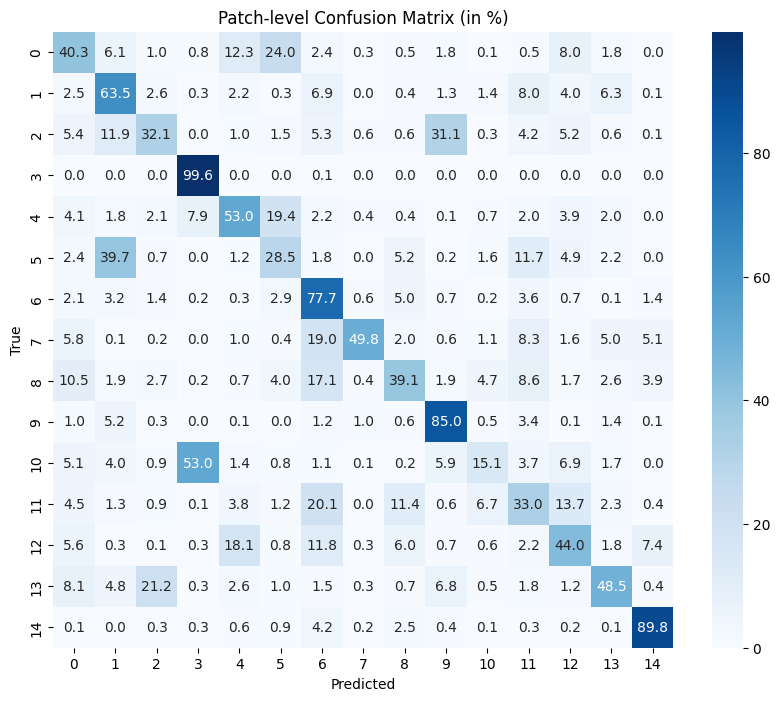

Slide-level Accuracy: 0.7059

Slide-level Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.50      0.80      0.62         5
           2       1.00      0.40      0.57         5
           3       0.83      1.00      0.91         5
           4       0.57      0.80      0.67         5
           5       0.60      0.60      0.60         5
           6       0.71      1.00      0.83         5
           7       1.00      0.80      0.89         5
           8       1.00      1.00      1.00         5
           9       0.57      0.80      0.67         5
          10       1.00      0.33      0.50         3
          11       0.33      0.33      0.33         3
          12       0.67      0.40      0.50         5
          13       0.67      0.67      0.67         3
          14       1.00      1.00      1.00         4

    accuracy                           0.71        68
   macro avg  

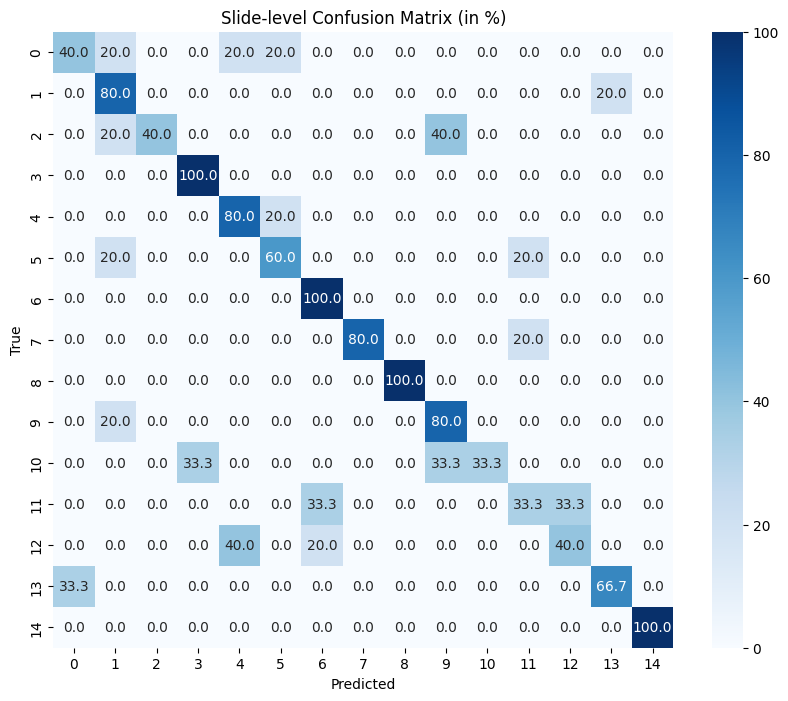

In [49]:
# test_loss /= len(test_loader.dataset)
# test_acc = test_corrects.double() / len(test_loader.dataset)

# print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# Patch-level Classification Report and Confusion Matrix
print("\nPatch-level Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)]))

cm_patch = confusion_matrix(all_labels, all_preds)
cm_patch_percentage = cm_patch.astype('float') / cm_patch.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cm_patch_percentage, annot=True, fmt='.1f', cmap='Blues', xticklabels=[str(i) for i in range(num_classes)], yticklabels=[str(i) for i in range(num_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Patch-level Confusion Matrix (in %)')
plt.show()

# Generate slide-level predictions
slide_preds = {}
for slide_id, preds in slide_predictions.items():
    # Majority vote or averaging probabilities can be used
    slide_preds[slide_id] = Counter(preds).most_common(1)[0][0]  # Majority vote

# Prepare slide-level true labels and predictions for evaluation
slide_true_labels = [label for slide_id, label in slide_labels.items()]
slide_pred_labels = [pred for slide_id, pred in slide_preds.items()]

# Calculate slide-level accuracy
slide_corrects = sum([1 if pred == true else 0 for pred, true in zip(slide_pred_labels, slide_true_labels)])
slide_accuracy = slide_corrects / len(slide_true_labels)

print(f"Slide-level Accuracy: {slide_accuracy:.4f}")

# Slide-level Classification Report and Confusion Matrix
print("\nSlide-level Classification Report:\n")
print(classification_report(slide_true_labels, slide_pred_labels, target_names=[str(i) for i in range(num_classes)]))

cm_slide = confusion_matrix(slide_true_labels, slide_pred_labels)
cm_slide_percentage = cm_slide.astype('float') / cm_slide.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cm_slide_percentage, annot=True, fmt='.1f', cmap='Blues', xticklabels=[str(i) for i in range(num_classes)], yticklabels=[str(i) for i in range(num_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Slide-level Confusion Matrix (in %)')
plt.show()


In [50]:
test_loss = 0.0
test_corrects = 0
all_preds = []
all_labels = []
slide_predictions = defaultdict(list)
slide_labels = {}

# Evaluation loop
with torch.no_grad():
    for inputs, labels, slide_ids in tqdm(remaining_loader, desc="Evaluating", unit="batch"):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = nn.CrossEntropyLoss()(outputs, labels)

        _, preds = torch.max(outputs, 1)
        test_loss += loss.item() * inputs.size(0)
        test_corrects += torch.sum(preds == labels.data)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Store predictions for each slide
        for slide_id, pred, label in zip(slide_ids, preds.cpu().numpy(), labels.cpu().numpy()):
            slide_predictions[slide_id].append(pred)
            slide_labels[slide_id] = label

        # Calculate current accuracy
        current_acc = test_corrects.double() / len(all_labels)

        # Update the progress bar with current accuracy
        tqdm.write(f"Batch Loss: {test_loss / len(all_labels):.4f}, Batch Accuracy: {current_acc.item():.4f}")



Evaluating:   0%|          | 1/656 [00:16<2:57:50, 16.29s/batch]

Batch Loss: 0.7041, Batch Accuracy: 0.7891


Evaluating:   0%|          | 2/656 [00:28<2:32:26, 13.99s/batch]

Batch Loss: 0.8410, Batch Accuracy: 0.7539


Evaluating:   0%|          | 3/656 [00:41<2:26:08, 13.43s/batch]

Batch Loss: 2.0188, Batch Accuracy: 0.5703


Evaluating:   1%|          | 4/656 [00:53<2:21:14, 13.00s/batch]

Batch Loss: 1.8774, Batch Accuracy: 0.5742


Evaluating:   1%|          | 5/656 [01:05<2:16:53, 12.62s/batch]

Batch Loss: 1.7447, Batch Accuracy: 0.5672


Evaluating:   1%|          | 6/656 [01:17<2:14:46, 12.44s/batch]

Batch Loss: 1.8479, Batch Accuracy: 0.5547


Evaluating:   1%|          | 7/656 [01:29<2:13:15, 12.32s/batch]

Batch Loss: 2.3342, Batch Accuracy: 0.5000


Evaluating:   1%|          | 8/656 [01:42<2:14:27, 12.45s/batch]

Batch Loss: 2.4727, Batch Accuracy: 0.4746


Evaluating:   1%|▏         | 9/656 [01:55<2:14:16, 12.45s/batch]

Batch Loss: 2.3229, Batch Accuracy: 0.5139


Evaluating:   2%|▏         | 10/656 [02:07<2:12:31, 12.31s/batch]

Batch Loss: 2.3316, Batch Accuracy: 0.5039


Evaluating:   2%|▏         | 11/656 [02:18<2:11:07, 12.20s/batch]

Batch Loss: 2.5572, Batch Accuracy: 0.4673


Evaluating:   2%|▏         | 12/656 [02:31<2:11:21, 12.24s/batch]

Batch Loss: 2.4694, Batch Accuracy: 0.4746


Evaluating:   2%|▏         | 13/656 [02:44<2:12:49, 12.39s/batch]

Batch Loss: 2.3088, Batch Accuracy: 0.5084


Evaluating:   2%|▏         | 14/656 [02:56<2:12:06, 12.35s/batch]

Batch Loss: 2.1715, Batch Accuracy: 0.5368


Evaluating:   2%|▏         | 15/656 [03:08<2:10:54, 12.25s/batch]

Batch Loss: 2.3604, Batch Accuracy: 0.5130


Evaluating:   2%|▏         | 16/656 [03:20<2:09:44, 12.16s/batch]

Batch Loss: 2.3530, Batch Accuracy: 0.5107


Evaluating:   3%|▎         | 17/656 [03:33<2:11:15, 12.32s/batch]

Batch Loss: 2.2376, Batch Accuracy: 0.5345


Evaluating:   3%|▎         | 18/656 [03:45<2:10:33, 12.28s/batch]

Batch Loss: 2.2216, Batch Accuracy: 0.5321


Evaluating:   3%|▎         | 19/656 [03:57<2:09:22, 12.19s/batch]

Batch Loss: 2.2411, Batch Accuracy: 0.5271


Evaluating:   3%|▎         | 20/656 [04:09<2:08:36, 12.13s/batch]

Batch Loss: 2.2944, Batch Accuracy: 0.5230


Evaluating:   3%|▎         | 21/656 [04:21<2:07:50, 12.08s/batch]

Batch Loss: 2.3315, Batch Accuracy: 0.5126


Evaluating:   3%|▎         | 22/656 [04:33<2:07:55, 12.11s/batch]

Batch Loss: 2.2948, Batch Accuracy: 0.5227


Evaluating:   4%|▎         | 23/656 [04:45<2:08:33, 12.19s/batch]

Batch Loss: 2.2784, Batch Accuracy: 0.5282


Evaluating:   4%|▎         | 24/656 [04:57<2:07:17, 12.08s/batch]

Batch Loss: 2.2736, Batch Accuracy: 0.5299


Evaluating:   4%|▍         | 25/656 [05:09<2:08:13, 12.19s/batch]

Batch Loss: 2.2328, Batch Accuracy: 0.5369


Evaluating:   4%|▍         | 26/656 [05:21<2:07:26, 12.14s/batch]

Batch Loss: 2.2099, Batch Accuracy: 0.5334


Evaluating:   4%|▍         | 27/656 [05:33<2:06:41, 12.09s/batch]

Batch Loss: 2.2470, Batch Accuracy: 0.5304


Evaluating:   4%|▍         | 28/656 [05:46<2:07:36, 12.19s/batch]

Batch Loss: 2.2594, Batch Accuracy: 0.5338


Evaluating:   4%|▍         | 29/656 [05:58<2:06:36, 12.12s/batch]

Batch Loss: 2.2146, Batch Accuracy: 0.5388


Evaluating:   5%|▍         | 30/656 [06:10<2:06:54, 12.16s/batch]

Batch Loss: 2.1901, Batch Accuracy: 0.5409


Evaluating:   5%|▍         | 31/656 [06:22<2:06:17, 12.12s/batch]

Batch Loss: 2.3524, Batch Accuracy: 0.5325


Evaluating:   5%|▍         | 32/656 [06:35<2:07:21, 12.25s/batch]

Batch Loss: 2.3816, Batch Accuracy: 0.5320


Evaluating:   5%|▌         | 33/656 [06:47<2:07:42, 12.30s/batch]

Batch Loss: 2.3490, Batch Accuracy: 0.5381


Evaluating:   5%|▌         | 34/656 [06:59<2:07:32, 12.30s/batch]

Batch Loss: 2.3737, Batch Accuracy: 0.5379


Evaluating:   5%|▌         | 35/656 [07:12<2:07:17, 12.30s/batch]

Batch Loss: 2.3192, Batch Accuracy: 0.5471


Evaluating:   5%|▌         | 36/656 [07:24<2:05:48, 12.18s/batch]

Batch Loss: 2.3389, Batch Accuracy: 0.5414


Evaluating:   6%|▌         | 37/656 [07:36<2:06:15, 12.24s/batch]

Batch Loss: 2.3405, Batch Accuracy: 0.5380


Evaluating:   6%|▌         | 38/656 [07:48<2:06:27, 12.28s/batch]

Batch Loss: 2.3526, Batch Accuracy: 0.5350


Evaluating:   6%|▌         | 39/656 [08:01<2:06:56, 12.34s/batch]

Batch Loss: 2.3342, Batch Accuracy: 0.5399


Evaluating:   6%|▌         | 40/656 [08:13<2:05:21, 12.21s/batch]

Batch Loss: 2.3467, Batch Accuracy: 0.5383


Evaluating:   6%|▋         | 41/656 [08:25<2:04:30, 12.15s/batch]

Batch Loss: 2.3520, Batch Accuracy: 0.5360


Evaluating:   6%|▋         | 42/656 [08:37<2:06:00, 12.31s/batch]

Batch Loss: 2.3408, Batch Accuracy: 0.5370


Evaluating:   7%|▋         | 43/656 [08:50<2:05:52, 12.32s/batch]

Batch Loss: 2.3177, Batch Accuracy: 0.5409


Evaluating:   7%|▋         | 44/656 [09:02<2:04:22, 12.19s/batch]

Batch Loss: 2.3042, Batch Accuracy: 0.5453


Evaluating:   7%|▋         | 45/656 [09:14<2:03:19, 12.11s/batch]

Batch Loss: 2.2936, Batch Accuracy: 0.5497


Evaluating:   7%|▋         | 46/656 [09:26<2:03:04, 12.11s/batch]

Batch Loss: 2.2737, Batch Accuracy: 0.5518


Evaluating:   7%|▋         | 47/656 [09:38<2:04:55, 12.31s/batch]

Batch Loss: 2.2382, Batch Accuracy: 0.5580


Evaluating:   7%|▋         | 48/656 [09:51<2:04:56, 12.33s/batch]

Batch Loss: 2.1967, Batch Accuracy: 0.5656


Evaluating:   7%|▋         | 49/656 [10:03<2:04:34, 12.31s/batch]

Batch Loss: 2.1695, Batch Accuracy: 0.5694


Evaluating:   8%|▊         | 50/656 [10:15<2:03:14, 12.20s/batch]

Batch Loss: 2.1579, Batch Accuracy: 0.5708


Evaluating:   8%|▊         | 51/656 [10:27<2:03:14, 12.22s/batch]

Batch Loss: 2.1967, Batch Accuracy: 0.5656


Evaluating:   8%|▊         | 52/656 [10:40<2:04:46, 12.39s/batch]

Batch Loss: 2.1824, Batch Accuracy: 0.5654


Evaluating:   8%|▊         | 53/656 [10:52<2:03:20, 12.27s/batch]

Batch Loss: 2.1917, Batch Accuracy: 0.5618


Evaluating:   8%|▊         | 54/656 [11:04<2:03:05, 12.27s/batch]

Batch Loss: 2.1671, Batch Accuracy: 0.5661


Evaluating:   8%|▊         | 55/656 [11:17<2:03:06, 12.29s/batch]

Batch Loss: 2.1372, Batch Accuracy: 0.5713


Evaluating:   9%|▊         | 56/656 [11:29<2:03:10, 12.32s/batch]

Batch Loss: 2.1094, Batch Accuracy: 0.5758


Evaluating:   9%|▊         | 57/656 [11:42<2:04:14, 12.45s/batch]

Batch Loss: 2.0796, Batch Accuracy: 0.5806


Evaluating:   9%|▉         | 58/656 [11:54<2:03:08, 12.36s/batch]

Batch Loss: 2.0516, Batch Accuracy: 0.5858


Evaluating:   9%|▉         | 59/656 [12:06<2:01:53, 12.25s/batch]

Batch Loss: 2.0407, Batch Accuracy: 0.5862


Evaluating:   9%|▉         | 60/656 [12:18<2:00:36, 12.14s/batch]

Batch Loss: 2.0797, Batch Accuracy: 0.5794


Evaluating:   9%|▉         | 61/656 [12:30<2:01:13, 12.22s/batch]

Batch Loss: 2.1084, Batch Accuracy: 0.5788


Evaluating:   9%|▉         | 62/656 [12:43<2:02:37, 12.39s/batch]

Batch Loss: 2.1000, Batch Accuracy: 0.5790


Evaluating:  10%|▉         | 63/656 [12:55<2:02:35, 12.40s/batch]

Batch Loss: 2.0726, Batch Accuracy: 0.5841


Evaluating:  10%|▉         | 64/656 [13:07<2:01:15, 12.29s/batch]

Batch Loss: 2.1178, Batch Accuracy: 0.5798


Evaluating:  10%|▉         | 65/656 [13:19<2:00:10, 12.20s/batch]

Batch Loss: 2.1247, Batch Accuracy: 0.5794


Evaluating:  10%|█         | 66/656 [13:31<1:58:58, 12.10s/batch]

Batch Loss: 2.1978, Batch Accuracy: 0.5720


Evaluating:  10%|█         | 67/656 [13:44<1:59:18, 12.15s/batch]

Batch Loss: 2.2284, Batch Accuracy: 0.5680


Evaluating:  10%|█         | 68/656 [13:55<1:58:15, 12.07s/batch]

Batch Loss: 2.2322, Batch Accuracy: 0.5666


Evaluating:  11%|█         | 69/656 [14:08<1:58:57, 12.16s/batch]

Batch Loss: 2.2953, Batch Accuracy: 0.5617


Evaluating:  11%|█         | 70/656 [14:20<1:58:04, 12.09s/batch]

Batch Loss: 2.2744, Batch Accuracy: 0.5650


Evaluating:  11%|█         | 71/656 [14:32<1:57:20, 12.03s/batch]

Batch Loss: 2.2531, Batch Accuracy: 0.5684


Evaluating:  11%|█         | 72/656 [14:44<1:58:34, 12.18s/batch]

Batch Loss: 2.2371, Batch Accuracy: 0.5701


Evaluating:  11%|█         | 73/656 [14:56<1:58:05, 12.15s/batch]

Batch Loss: 2.2175, Batch Accuracy: 0.5731


Evaluating:  11%|█▏        | 74/656 [15:08<1:57:44, 12.14s/batch]

Batch Loss: 2.2010, Batch Accuracy: 0.5757


Evaluating:  11%|█▏        | 75/656 [15:21<1:58:08, 12.20s/batch]

Batch Loss: 2.2118, Batch Accuracy: 0.5725


Evaluating:  12%|█▏        | 76/656 [15:33<1:57:47, 12.18s/batch]

Batch Loss: 2.2164, Batch Accuracy: 0.5706


Evaluating:  12%|█▏        | 77/656 [15:46<1:58:55, 12.32s/batch]

Batch Loss: 2.2401, Batch Accuracy: 0.5680


Evaluating:  12%|█▏        | 78/656 [15:58<1:58:06, 12.26s/batch]

Batch Loss: 2.2278, Batch Accuracy: 0.5697


Evaluating:  12%|█▏        | 79/656 [16:10<1:58:07, 12.28s/batch]

Batch Loss: 2.2179, Batch Accuracy: 0.5697


Evaluating:  12%|█▏        | 80/656 [16:22<1:57:39, 12.26s/batch]

Batch Loss: 2.2297, Batch Accuracy: 0.5657


Evaluating:  12%|█▏        | 81/656 [16:35<1:57:49, 12.30s/batch]

Batch Loss: 2.2275, Batch Accuracy: 0.5645


Evaluating:  12%|█▎        | 82/656 [16:47<1:58:26, 12.38s/batch]

Batch Loss: 2.2100, Batch Accuracy: 0.5668


Evaluating:  13%|█▎        | 83/656 [16:59<1:57:42, 12.33s/batch]

Batch Loss: 2.1910, Batch Accuracy: 0.5702


Evaluating:  13%|█▎        | 84/656 [17:11<1:56:17, 12.20s/batch]

Batch Loss: 2.2044, Batch Accuracy: 0.5682


Evaluating:  13%|█▎        | 85/656 [17:23<1:56:03, 12.20s/batch]

Batch Loss: 2.2283, Batch Accuracy: 0.5650


Evaluating:  13%|█▎        | 86/656 [17:36<1:56:38, 12.28s/batch]

Batch Loss: 2.2302, Batch Accuracy: 0.5641


Evaluating:  13%|█▎        | 87/656 [17:48<1:55:59, 12.23s/batch]

Batch Loss: 2.2179, Batch Accuracy: 0.5670


Evaluating:  13%|█▎        | 88/656 [18:00<1:55:21, 12.19s/batch]

Batch Loss: 2.2256, Batch Accuracy: 0.5660


Evaluating:  14%|█▎        | 89/656 [18:12<1:55:14, 12.20s/batch]

Batch Loss: 2.2220, Batch Accuracy: 0.5672


Evaluating:  14%|█▎        | 90/656 [18:24<1:54:50, 12.17s/batch]

Batch Loss: 2.2030, Batch Accuracy: 0.5706


Evaluating:  14%|█▍        | 91/656 [18:37<1:55:56, 12.31s/batch]

Batch Loss: 2.1910, Batch Accuracy: 0.5713


Evaluating:  14%|█▍        | 92/656 [18:49<1:54:24, 12.17s/batch]

Batch Loss: 2.1730, Batch Accuracy: 0.5746


Evaluating:  14%|█▍        | 93/656 [19:01<1:53:21, 12.08s/batch]

Batch Loss: 2.1764, Batch Accuracy: 0.5724


Evaluating:  14%|█▍        | 94/656 [19:13<1:52:21, 11.99s/batch]

Batch Loss: 2.1702, Batch Accuracy: 0.5726


Evaluating:  14%|█▍        | 95/656 [19:25<1:52:40, 12.05s/batch]

Batch Loss: 2.1741, Batch Accuracy: 0.5707


Evaluating:  15%|█▍        | 96/656 [19:38<1:54:53, 12.31s/batch]

Batch Loss: 2.1627, Batch Accuracy: 0.5730


Evaluating:  15%|█▍        | 97/656 [19:50<1:53:25, 12.17s/batch]

Batch Loss: 2.1462, Batch Accuracy: 0.5754


Evaluating:  15%|█▍        | 98/656 [20:02<1:53:21, 12.19s/batch]

Batch Loss: 2.1463, Batch Accuracy: 0.5730


Evaluating:  15%|█▌        | 99/656 [20:14<1:52:23, 12.11s/batch]

Batch Loss: 2.1654, Batch Accuracy: 0.5708


Evaluating:  15%|█▌        | 100/656 [20:26<1:51:25, 12.02s/batch]

Batch Loss: 2.1722, Batch Accuracy: 0.5682


Evaluating:  15%|█▌        | 101/656 [20:38<1:53:03, 12.22s/batch]

Batch Loss: 2.1589, Batch Accuracy: 0.5708


Evaluating:  16%|█▌        | 102/656 [20:50<1:51:46, 12.11s/batch]

Batch Loss: 2.1611, Batch Accuracy: 0.5695


Evaluating:  16%|█▌        | 103/656 [21:03<1:52:46, 12.24s/batch]

Batch Loss: 2.1565, Batch Accuracy: 0.5692


Evaluating:  16%|█▌        | 104/656 [21:14<1:51:33, 12.13s/batch]

Batch Loss: 2.1629, Batch Accuracy: 0.5669


Evaluating:  16%|█▌        | 105/656 [21:26<1:50:26, 12.03s/batch]

Batch Loss: 2.1602, Batch Accuracy: 0.5661


Evaluating:  16%|█▌        | 106/656 [21:40<1:54:11, 12.46s/batch]

Batch Loss: 2.1743, Batch Accuracy: 0.5638


Evaluating:  16%|█▋        | 107/656 [21:52<1:52:30, 12.30s/batch]

Batch Loss: 2.1675, Batch Accuracy: 0.5641


Evaluating:  16%|█▋        | 108/656 [22:04<1:51:24, 12.20s/batch]

Batch Loss: 2.1605, Batch Accuracy: 0.5651


Evaluating:  17%|█▋        | 109/656 [22:16<1:50:34, 12.13s/batch]

Batch Loss: 2.1535, Batch Accuracy: 0.5655


Evaluating:  17%|█▋        | 110/656 [22:28<1:49:51, 12.07s/batch]

Batch Loss: 2.2013, Batch Accuracy: 0.5636


Evaluating:  17%|█▋        | 111/656 [22:40<1:51:16, 12.25s/batch]

Batch Loss: 2.2202, Batch Accuracy: 0.5605


Evaluating:  17%|█▋        | 112/656 [22:52<1:50:07, 12.15s/batch]

Batch Loss: 2.2288, Batch Accuracy: 0.5582


Evaluating:  17%|█▋        | 113/656 [23:04<1:50:21, 12.19s/batch]

Batch Loss: 2.2445, Batch Accuracy: 0.5550


Evaluating:  17%|█▋        | 114/656 [23:16<1:49:02, 12.07s/batch]

Batch Loss: 2.2356, Batch Accuracy: 0.5563


Evaluating:  18%|█▊        | 115/656 [23:28<1:48:14, 12.01s/batch]

Batch Loss: 2.2666, Batch Accuracy: 0.5533


Evaluating:  18%|█▊        | 116/656 [23:41<1:50:37, 12.29s/batch]

Batch Loss: 2.2553, Batch Accuracy: 0.5552


Evaluating:  18%|█▊        | 117/656 [23:53<1:48:55, 12.13s/batch]

Batch Loss: 2.2432, Batch Accuracy: 0.5567


Evaluating:  18%|█▊        | 118/656 [24:05<1:48:48, 12.13s/batch]

Batch Loss: 2.2396, Batch Accuracy: 0.5574


Evaluating:  18%|█▊        | 119/656 [24:17<1:48:39, 12.14s/batch]

Batch Loss: 2.2389, Batch Accuracy: 0.5557


Evaluating:  18%|█▊        | 120/656 [24:29<1:47:36, 12.05s/batch]

Batch Loss: 2.2831, Batch Accuracy: 0.5542


Evaluating:  18%|█▊        | 121/656 [24:42<1:49:14, 12.25s/batch]

Batch Loss: 2.3019, Batch Accuracy: 0.5549


Evaluating:  19%|█▊        | 122/656 [24:54<1:48:44, 12.22s/batch]

Batch Loss: 2.2953, Batch Accuracy: 0.5550


Evaluating:  19%|█▉        | 123/656 [25:06<1:47:30, 12.10s/batch]

Batch Loss: 2.3056, Batch Accuracy: 0.5519


Evaluating:  19%|█▉        | 124/656 [25:18<1:47:16, 12.10s/batch]

Batch Loss: 2.3018, Batch Accuracy: 0.5524


Evaluating:  19%|█▉        | 125/656 [25:30<1:46:56, 12.08s/batch]

Batch Loss: 2.2933, Batch Accuracy: 0.5546


Evaluating:  19%|█▉        | 126/656 [25:42<1:48:17, 12.26s/batch]

Batch Loss: 2.2945, Batch Accuracy: 0.5551


Evaluating:  19%|█▉        | 127/656 [25:55<1:48:22, 12.29s/batch]

Batch Loss: 2.3200, Batch Accuracy: 0.5525


Evaluating:  20%|█▉        | 128/656 [26:07<1:47:39, 12.23s/batch]

Batch Loss: 2.3190, Batch Accuracy: 0.5519


Evaluating:  20%|█▉        | 129/656 [26:19<1:47:18, 12.22s/batch]

Batch Loss: 2.3275, Batch Accuracy: 0.5508


Evaluating:  20%|█▉        | 130/656 [26:31<1:45:52, 12.08s/batch]

Batch Loss: 2.3299, Batch Accuracy: 0.5490


Evaluating:  20%|█▉        | 131/656 [26:43<1:47:08, 12.24s/batch]

Batch Loss: 2.3313, Batch Accuracy: 0.5475


Evaluating:  20%|██        | 132/656 [26:56<1:46:35, 12.20s/batch]

Batch Loss: 2.3214, Batch Accuracy: 0.5485


Evaluating:  20%|██        | 133/656 [27:07<1:45:43, 12.13s/batch]

Batch Loss: 2.3280, Batch Accuracy: 0.5469


Evaluating:  20%|██        | 134/656 [27:19<1:44:45, 12.04s/batch]

Batch Loss: 2.3214, Batch Accuracy: 0.5474


Evaluating:  21%|██        | 135/656 [27:31<1:44:12, 12.00s/batch]

Batch Loss: 2.3124, Batch Accuracy: 0.5485


Evaluating:  21%|██        | 136/656 [27:44<1:45:05, 12.13s/batch]

Batch Loss: 2.2969, Batch Accuracy: 0.5513


Evaluating:  21%|██        | 137/656 [27:56<1:44:50, 12.12s/batch]

Batch Loss: 2.2852, Batch Accuracy: 0.5533


Evaluating:  21%|██        | 138/656 [28:08<1:44:26, 12.10s/batch]

Batch Loss: 2.3023, Batch Accuracy: 0.5529


Evaluating:  21%|██        | 139/656 [28:20<1:43:44, 12.04s/batch]

Batch Loss: 2.3145, Batch Accuracy: 0.5518


Evaluating:  21%|██▏       | 140/656 [28:32<1:44:43, 12.18s/batch]

Batch Loss: 2.3270, Batch Accuracy: 0.5501


Evaluating:  21%|██▏       | 141/656 [28:45<1:45:26, 12.28s/batch]

Batch Loss: 2.3260, Batch Accuracy: 0.5510


Evaluating:  22%|██▏       | 142/656 [28:57<1:44:21, 12.18s/batch]

Batch Loss: 2.3337, Batch Accuracy: 0.5502


Evaluating:  22%|██▏       | 143/656 [29:09<1:43:47, 12.14s/batch]

Batch Loss: 2.3244, Batch Accuracy: 0.5517


Evaluating:  22%|██▏       | 144/656 [29:21<1:42:57, 12.06s/batch]

Batch Loss: 2.3170, Batch Accuracy: 0.5521


Evaluating:  22%|██▏       | 145/656 [29:34<1:45:32, 12.39s/batch]

Batch Loss: 2.3120, Batch Accuracy: 0.5516


Evaluating:  22%|██▏       | 146/656 [29:46<1:44:17, 12.27s/batch]

Batch Loss: 2.3041, Batch Accuracy: 0.5522


Evaluating:  22%|██▏       | 147/656 [29:58<1:43:26, 12.19s/batch]

Batch Loss: 2.3218, Batch Accuracy: 0.5497


Evaluating:  23%|██▎       | 148/656 [30:10<1:42:48, 12.14s/batch]

Batch Loss: 2.3277, Batch Accuracy: 0.5480


Evaluating:  23%|██▎       | 149/656 [30:22<1:41:53, 12.06s/batch]

Batch Loss: 2.3365, Batch Accuracy: 0.5465


Evaluating:  23%|██▎       | 150/656 [30:34<1:42:57, 12.21s/batch]

Batch Loss: 2.3316, Batch Accuracy: 0.5478


Evaluating:  23%|██▎       | 151/656 [30:47<1:43:02, 12.24s/batch]

Batch Loss: 2.3209, Batch Accuracy: 0.5492


Evaluating:  23%|██▎       | 152/656 [30:59<1:43:33, 12.33s/batch]

Batch Loss: 2.3131, Batch Accuracy: 0.5498


Evaluating:  23%|██▎       | 153/656 [31:12<1:44:11, 12.43s/batch]

Batch Loss: 2.3036, Batch Accuracy: 0.5511


Evaluating:  23%|██▎       | 154/656 [31:24<1:42:26, 12.24s/batch]

Batch Loss: 2.2947, Batch Accuracy: 0.5529


Evaluating:  24%|██▎       | 155/656 [31:36<1:43:09, 12.35s/batch]

Batch Loss: 2.3184, Batch Accuracy: 0.5507


Evaluating:  24%|██▍       | 156/656 [31:48<1:41:49, 12.22s/batch]

Batch Loss: 2.3110, Batch Accuracy: 0.5510


Evaluating:  24%|██▍       | 157/656 [32:00<1:40:34, 12.09s/batch]

Batch Loss: 2.3055, Batch Accuracy: 0.5519


Evaluating:  24%|██▍       | 158/656 [32:12<1:40:37, 12.12s/batch]

Batch Loss: 2.2963, Batch Accuracy: 0.5532


Evaluating:  24%|██▍       | 159/656 [32:24<1:40:44, 12.16s/batch]

Batch Loss: 2.2869, Batch Accuracy: 0.5549


Evaluating:  24%|██▍       | 160/656 [32:37<1:42:20, 12.38s/batch]

Batch Loss: 2.2817, Batch Accuracy: 0.5555


Evaluating:  25%|██▍       | 161/656 [32:49<1:41:12, 12.27s/batch]

Batch Loss: 2.2750, Batch Accuracy: 0.5561


Evaluating:  25%|██▍       | 162/656 [33:01<1:40:23, 12.19s/batch]

Batch Loss: 2.2806, Batch Accuracy: 0.5544


Evaluating:  25%|██▍       | 163/656 [33:13<1:40:19, 12.21s/batch]

Batch Loss: 2.2731, Batch Accuracy: 0.5557


Evaluating:  25%|██▌       | 164/656 [33:25<1:39:11, 12.10s/batch]

Batch Loss: 2.2643, Batch Accuracy: 0.5570


Evaluating:  25%|██▌       | 165/656 [33:38<1:40:08, 12.24s/batch]

Batch Loss: 2.2618, Batch Accuracy: 0.5580


Evaluating:  25%|██▌       | 166/656 [33:50<1:39:56, 12.24s/batch]

Batch Loss: 2.2633, Batch Accuracy: 0.5577


Evaluating:  25%|██▌       | 167/656 [34:02<1:38:41, 12.11s/batch]

Batch Loss: 2.2636, Batch Accuracy: 0.5572


Evaluating:  26%|██▌       | 168/656 [34:14<1:37:47, 12.02s/batch]

Batch Loss: 2.2536, Batch Accuracy: 0.5590


Evaluating:  26%|██▌       | 169/656 [34:26<1:37:27, 12.01s/batch]

Batch Loss: 2.2506, Batch Accuracy: 0.5591


Evaluating:  26%|██▌       | 170/656 [34:38<1:39:11, 12.25s/batch]

Batch Loss: 2.2421, Batch Accuracy: 0.5602


Evaluating:  26%|██▌       | 171/656 [34:51<1:39:21, 12.29s/batch]

Batch Loss: 2.2364, Batch Accuracy: 0.5610


Evaluating:  26%|██▌       | 172/656 [35:03<1:38:12, 12.17s/batch]

Batch Loss: 2.2323, Batch Accuracy: 0.5612


Evaluating:  26%|██▋       | 173/656 [35:15<1:37:38, 12.13s/batch]

Batch Loss: 2.2338, Batch Accuracy: 0.5616


Evaluating:  27%|██▋       | 174/656 [35:27<1:37:41, 12.16s/batch]

Batch Loss: 2.2643, Batch Accuracy: 0.5589


Evaluating:  27%|██▋       | 175/656 [35:40<1:38:33, 12.30s/batch]

Batch Loss: 2.2667, Batch Accuracy: 0.5591


Evaluating:  27%|██▋       | 176/656 [35:53<1:41:33, 12.69s/batch]

Batch Loss: 2.2844, Batch Accuracy: 0.5571


Evaluating:  27%|██▋       | 177/656 [36:05<1:39:56, 12.52s/batch]

Batch Loss: 2.2914, Batch Accuracy: 0.5553


Evaluating:  27%|██▋       | 178/656 [36:18<1:39:46, 12.52s/batch]

Batch Loss: 2.2944, Batch Accuracy: 0.5541


Evaluating:  27%|██▋       | 179/656 [36:31<1:40:47, 12.68s/batch]

Batch Loss: 2.2863, Batch Accuracy: 0.5553


Evaluating:  27%|██▋       | 180/656 [36:45<1:44:08, 13.13s/batch]

Batch Loss: 2.2759, Batch Accuracy: 0.5573


Evaluating:  28%|██▊       | 181/656 [36:57<1:41:51, 12.87s/batch]

Batch Loss: 2.2713, Batch Accuracy: 0.5584


Evaluating:  28%|██▊       | 182/656 [37:10<1:41:26, 12.84s/batch]

Batch Loss: 2.2610, Batch Accuracy: 0.5603


Evaluating:  28%|██▊       | 183/656 [37:23<1:41:20, 12.86s/batch]

Batch Loss: 2.2545, Batch Accuracy: 0.5611


Evaluating:  28%|██▊       | 184/656 [37:36<1:40:58, 12.84s/batch]

Batch Loss: 2.2539, Batch Accuracy: 0.5600


Evaluating:  28%|██▊       | 185/656 [37:49<1:42:25, 13.05s/batch]

Batch Loss: 2.2722, Batch Accuracy: 0.5581


Evaluating:  28%|██▊       | 186/656 [38:03<1:42:36, 13.10s/batch]

Batch Loss: 2.3162, Batch Accuracy: 0.5552


Evaluating:  29%|██▊       | 187/656 [38:15<1:39:40, 12.75s/batch]

Batch Loss: 2.3183, Batch Accuracy: 0.5544


Evaluating:  29%|██▊       | 188/656 [38:27<1:37:34, 12.51s/batch]

Batch Loss: 2.3123, Batch Accuracy: 0.5552


Evaluating:  29%|██▉       | 189/656 [38:40<1:38:48, 12.69s/batch]

Batch Loss: 2.3042, Batch Accuracy: 0.5563


Evaluating:  29%|██▉       | 190/656 [38:52<1:38:11, 12.64s/batch]

Batch Loss: 2.2979, Batch Accuracy: 0.5569


Evaluating:  29%|██▉       | 191/656 [39:05<1:37:21, 12.56s/batch]

Batch Loss: 2.3222, Batch Accuracy: 0.5551


Evaluating:  29%|██▉       | 192/656 [39:16<1:35:44, 12.38s/batch]

Batch Loss: 2.3411, Batch Accuracy: 0.5550


Evaluating:  29%|██▉       | 193/656 [39:28<1:34:28, 12.24s/batch]

Batch Loss: 2.3478, Batch Accuracy: 0.5538


Evaluating:  30%|██▉       | 194/656 [39:41<1:35:14, 12.37s/batch]

Batch Loss: 2.3471, Batch Accuracy: 0.5530


Evaluating:  30%|██▉       | 195/656 [39:53<1:33:44, 12.20s/batch]

Batch Loss: 2.3452, Batch Accuracy: 0.5525


Evaluating:  30%|██▉       | 196/656 [40:05<1:32:52, 12.11s/batch]

Batch Loss: 2.3566, Batch Accuracy: 0.5507


Evaluating:  30%|███       | 197/656 [40:17<1:32:48, 12.13s/batch]

Batch Loss: 2.3562, Batch Accuracy: 0.5498


Evaluating:  30%|███       | 198/656 [40:29<1:32:45, 12.15s/batch]

Batch Loss: 2.3574, Batch Accuracy: 0.5488


Evaluating:  30%|███       | 199/656 [40:43<1:35:23, 12.53s/batch]

Batch Loss: 2.3536, Batch Accuracy: 0.5490


Evaluating:  30%|███       | 200/656 [40:55<1:36:06, 12.65s/batch]

Batch Loss: 2.3545, Batch Accuracy: 0.5480


Evaluating:  31%|███       | 201/656 [41:08<1:35:39, 12.61s/batch]

Batch Loss: 2.3530, Batch Accuracy: 0.5477


Evaluating:  31%|███       | 202/656 [41:20<1:34:26, 12.48s/batch]

Batch Loss: 2.3556, Batch Accuracy: 0.5466


Evaluating:  31%|███       | 203/656 [41:33<1:34:31, 12.52s/batch]

Batch Loss: 2.3492, Batch Accuracy: 0.5473


Evaluating:  31%|███       | 204/656 [41:46<1:34:59, 12.61s/batch]

Batch Loss: 2.3412, Batch Accuracy: 0.5486


Evaluating:  31%|███▏      | 205/656 [41:58<1:33:23, 12.42s/batch]

Batch Loss: 2.3443, Batch Accuracy: 0.5471


Evaluating:  31%|███▏      | 206/656 [42:10<1:32:23, 12.32s/batch]

Batch Loss: 2.3422, Batch Accuracy: 0.5473


Evaluating:  32%|███▏      | 207/656 [42:22<1:31:23, 12.21s/batch]

Batch Loss: 2.3349, Batch Accuracy: 0.5483


Evaluating:  32%|███▏      | 208/656 [42:34<1:30:50, 12.17s/batch]

Batch Loss: 2.3340, Batch Accuracy: 0.5485


Evaluating:  32%|███▏      | 209/656 [42:46<1:31:58, 12.35s/batch]

Batch Loss: 2.3242, Batch Accuracy: 0.5502


Evaluating:  32%|███▏      | 210/656 [42:58<1:30:34, 12.19s/batch]

Batch Loss: 2.3308, Batch Accuracy: 0.5495


Evaluating:  32%|███▏      | 211/656 [43:10<1:29:32, 12.07s/batch]

Batch Loss: 2.3308, Batch Accuracy: 0.5494


Evaluating:  32%|███▏      | 212/656 [43:23<1:30:37, 12.25s/batch]

Batch Loss: 2.3281, Batch Accuracy: 0.5489


Evaluating:  32%|███▏      | 213/656 [43:35<1:30:06, 12.20s/batch]

Batch Loss: 2.3212, Batch Accuracy: 0.5498


Evaluating:  33%|███▎      | 214/656 [43:47<1:29:45, 12.18s/batch]

Batch Loss: 2.3297, Batch Accuracy: 0.5489


Evaluating:  33%|███▎      | 215/656 [43:59<1:29:17, 12.15s/batch]

Batch Loss: 2.3232, Batch Accuracy: 0.5502


Evaluating:  33%|███▎      | 216/656 [44:11<1:28:40, 12.09s/batch]

Batch Loss: 2.3148, Batch Accuracy: 0.5517


Evaluating:  33%|███▎      | 217/656 [44:23<1:29:13, 12.19s/batch]

Batch Loss: 2.3137, Batch Accuracy: 0.5516


Evaluating:  33%|███▎      | 218/656 [44:36<1:30:22, 12.38s/batch]

Batch Loss: 2.3107, Batch Accuracy: 0.5517


Evaluating:  33%|███▎      | 219/656 [44:48<1:28:57, 12.22s/batch]

Batch Loss: 2.3104, Batch Accuracy: 0.5515


Evaluating:  34%|███▎      | 220/656 [45:00<1:28:32, 12.19s/batch]

Batch Loss: 2.3042, Batch Accuracy: 0.5523


Evaluating:  34%|███▎      | 221/656 [45:12<1:27:41, 12.09s/batch]

Batch Loss: 2.2997, Batch Accuracy: 0.5525


Evaluating:  34%|███▍      | 222/656 [45:24<1:27:49, 12.14s/batch]

Batch Loss: 2.2964, Batch Accuracy: 0.5528


Evaluating:  34%|███▍      | 223/656 [45:37<1:28:53, 12.32s/batch]

Batch Loss: 2.2895, Batch Accuracy: 0.5538


Evaluating:  34%|███▍      | 224/656 [45:49<1:27:35, 12.17s/batch]

Batch Loss: 2.2828, Batch Accuracy: 0.5549


Evaluating:  34%|███▍      | 225/656 [46:01<1:27:52, 12.23s/batch]

Batch Loss: 2.2768, Batch Accuracy: 0.5560


Evaluating:  34%|███▍      | 226/656 [46:13<1:26:50, 12.12s/batch]

Batch Loss: 2.2803, Batch Accuracy: 0.5545


Evaluating:  35%|███▍      | 227/656 [46:25<1:26:08, 12.05s/batch]

Batch Loss: 2.2785, Batch Accuracy: 0.5544


Evaluating:  35%|███▍      | 228/656 [46:38<1:27:49, 12.31s/batch]

Batch Loss: 2.2717, Batch Accuracy: 0.5557


Evaluating:  35%|███▍      | 229/656 [46:50<1:26:37, 12.17s/batch]

Batch Loss: 2.2647, Batch Accuracy: 0.5570


Evaluating:  35%|███▌      | 230/656 [47:02<1:26:18, 12.16s/batch]

Batch Loss: 2.2633, Batch Accuracy: 0.5571


Evaluating:  35%|███▌      | 231/656 [47:14<1:25:22, 12.05s/batch]

Batch Loss: 2.2665, Batch Accuracy: 0.5566


Evaluating:  35%|███▌      | 232/656 [47:26<1:24:59, 12.03s/batch]

Batch Loss: 2.2730, Batch Accuracy: 0.5552


Evaluating:  36%|███▌      | 233/656 [47:39<1:27:20, 12.39s/batch]

Batch Loss: 2.2644, Batch Accuracy: 0.5567


Evaluating:  36%|███▌      | 234/656 [47:51<1:26:25, 12.29s/batch]

Batch Loss: 2.2632, Batch Accuracy: 0.5568


Evaluating:  36%|███▌      | 235/656 [48:03<1:26:04, 12.27s/batch]

Batch Loss: 2.2673, Batch Accuracy: 0.5565


Evaluating:  36%|███▌      | 236/656 [48:15<1:24:55, 12.13s/batch]

Batch Loss: 2.2592, Batch Accuracy: 0.5581


Evaluating:  36%|███▌      | 237/656 [48:27<1:24:09, 12.05s/batch]

Batch Loss: 2.2573, Batch Accuracy: 0.5580


Evaluating:  36%|███▋      | 238/656 [48:39<1:25:06, 12.22s/batch]

Batch Loss: 2.2547, Batch Accuracy: 0.5575


Evaluating:  36%|███▋      | 239/656 [48:51<1:24:04, 12.10s/batch]

Batch Loss: 2.2483, Batch Accuracy: 0.5583


Evaluating:  37%|███▋      | 240/656 [49:03<1:23:42, 12.07s/batch]

Batch Loss: 2.2468, Batch Accuracy: 0.5585


Evaluating:  37%|███▋      | 241/656 [49:15<1:23:03, 12.01s/batch]

Batch Loss: 2.2422, Batch Accuracy: 0.5589


Evaluating:  37%|███▋      | 242/656 [49:27<1:23:20, 12.08s/batch]

Batch Loss: 2.2366, Batch Accuracy: 0.5596


Evaluating:  37%|███▋      | 243/656 [49:40<1:24:39, 12.30s/batch]

Batch Loss: 2.2315, Batch Accuracy: 0.5604


Evaluating:  37%|███▋      | 244/656 [49:52<1:23:17, 12.13s/batch]

Batch Loss: 2.2293, Batch Accuracy: 0.5607


Evaluating:  37%|███▋      | 245/656 [50:04<1:22:28, 12.04s/batch]

Batch Loss: 2.2320, Batch Accuracy: 0.5603


Evaluating:  38%|███▊      | 246/656 [50:16<1:22:42, 12.10s/batch]

Batch Loss: 2.2315, Batch Accuracy: 0.5602


Evaluating:  38%|███▊      | 247/656 [50:28<1:22:24, 12.09s/batch]

Batch Loss: 2.2333, Batch Accuracy: 0.5593


Evaluating:  38%|███▊      | 248/656 [50:41<1:23:45, 12.32s/batch]

Batch Loss: 2.2343, Batch Accuracy: 0.5588


Evaluating:  38%|███▊      | 249/656 [50:53<1:22:27, 12.16s/batch]

Batch Loss: 2.2303, Batch Accuracy: 0.5595


Evaluating:  38%|███▊      | 250/656 [51:05<1:21:48, 12.09s/batch]

Batch Loss: 2.2278, Batch Accuracy: 0.5602


Evaluating:  38%|███▊      | 251/656 [51:17<1:21:49, 12.12s/batch]

Batch Loss: 2.2231, Batch Accuracy: 0.5608


Evaluating:  38%|███▊      | 252/656 [51:29<1:22:00, 12.18s/batch]

Batch Loss: 2.2433, Batch Accuracy: 0.5598


Evaluating:  39%|███▊      | 253/656 [51:42<1:22:35, 12.30s/batch]

Batch Loss: 2.2506, Batch Accuracy: 0.5599


Evaluating:  39%|███▊      | 254/656 [51:54<1:21:45, 12.20s/batch]

Batch Loss: 2.2654, Batch Accuracy: 0.5584


Evaluating:  39%|███▉      | 255/656 [52:06<1:21:20, 12.17s/batch]

Batch Loss: 2.2611, Batch Accuracy: 0.5591


Evaluating:  39%|███▉      | 256/656 [52:18<1:21:10, 12.18s/batch]

Batch Loss: 2.2549, Batch Accuracy: 0.5599


Evaluating:  39%|███▉      | 257/656 [52:30<1:20:16, 12.07s/batch]

Batch Loss: 2.2496, Batch Accuracy: 0.5607


Evaluating:  39%|███▉      | 258/656 [52:42<1:21:13, 12.25s/batch]

Batch Loss: 2.2451, Batch Accuracy: 0.5611


Evaluating:  39%|███▉      | 259/656 [52:55<1:21:12, 12.27s/batch]

Batch Loss: 2.2450, Batch Accuracy: 0.5610


Evaluating:  40%|███▉      | 260/656 [53:07<1:20:04, 12.13s/batch]

Batch Loss: 2.2376, Batch Accuracy: 0.5625


Evaluating:  40%|███▉      | 261/656 [53:18<1:19:16, 12.04s/batch]

Batch Loss: 2.2383, Batch Accuracy: 0.5625


Evaluating:  40%|███▉      | 262/656 [53:31<1:19:27, 12.10s/batch]

Batch Loss: 2.2325, Batch Accuracy: 0.5634


Evaluating:  40%|████      | 263/656 [53:43<1:19:42, 12.17s/batch]

Batch Loss: 2.2426, Batch Accuracy: 0.5629


Evaluating:  40%|████      | 264/656 [53:55<1:19:29, 12.17s/batch]

Batch Loss: 2.2486, Batch Accuracy: 0.5619


Evaluating:  40%|████      | 265/656 [54:07<1:18:49, 12.10s/batch]

Batch Loss: 2.2464, Batch Accuracy: 0.5617


Evaluating:  41%|████      | 266/656 [54:19<1:18:13, 12.04s/batch]

Batch Loss: 2.2507, Batch Accuracy: 0.5611


Evaluating:  41%|████      | 267/656 [54:31<1:18:10, 12.06s/batch]

Batch Loss: 2.2549, Batch Accuracy: 0.5607


Evaluating:  41%|████      | 268/656 [54:43<1:18:26, 12.13s/batch]

Batch Loss: 2.2541, Batch Accuracy: 0.5605


Evaluating:  41%|████      | 269/656 [54:55<1:17:33, 12.02s/batch]

Batch Loss: 2.2662, Batch Accuracy: 0.5587


Evaluating:  41%|████      | 270/656 [55:07<1:17:35, 12.06s/batch]

Batch Loss: 2.2702, Batch Accuracy: 0.5584


Evaluating:  41%|████▏     | 271/656 [55:19<1:17:35, 12.09s/batch]

Batch Loss: 2.2722, Batch Accuracy: 0.5579


Evaluating:  41%|████▏     | 272/656 [55:32<1:17:33, 12.12s/batch]

Batch Loss: 2.2785, Batch Accuracy: 0.5566


Evaluating:  42%|████▏     | 273/656 [55:44<1:18:11, 12.25s/batch]

Batch Loss: 2.2751, Batch Accuracy: 0.5573


Evaluating:  42%|████▏     | 274/656 [55:56<1:17:07, 12.11s/batch]

Batch Loss: 2.2763, Batch Accuracy: 0.5571


Evaluating:  42%|████▏     | 275/656 [56:08<1:16:48, 12.09s/batch]

Batch Loss: 2.2772, Batch Accuracy: 0.5572


Evaluating:  42%|████▏     | 276/656 [56:20<1:16:03, 12.01s/batch]

Batch Loss: 2.2713, Batch Accuracy: 0.5584


Evaluating:  42%|████▏     | 277/656 [56:32<1:16:30, 12.11s/batch]

Batch Loss: 2.2682, Batch Accuracy: 0.5591


Evaluating:  42%|████▏     | 278/656 [56:45<1:16:41, 12.17s/batch]

Batch Loss: 2.2689, Batch Accuracy: 0.5585


Evaluating:  43%|████▎     | 279/656 [56:56<1:16:02, 12.10s/batch]

Batch Loss: 2.2930, Batch Accuracy: 0.5578


Evaluating:  43%|████▎     | 280/656 [57:09<1:16:01, 12.13s/batch]

Batch Loss: 2.2920, Batch Accuracy: 0.5580


Evaluating:  43%|████▎     | 281/656 [57:21<1:15:18, 12.05s/batch]

Batch Loss: 2.2884, Batch Accuracy: 0.5583


Evaluating:  43%|████▎     | 282/656 [57:33<1:14:56, 12.02s/batch]

Batch Loss: 2.2919, Batch Accuracy: 0.5573


Evaluating:  43%|████▎     | 283/656 [57:45<1:15:01, 12.07s/batch]

Batch Loss: 2.2989, Batch Accuracy: 0.5560


Evaluating:  43%|████▎     | 284/656 [57:56<1:14:17, 11.98s/batch]

Batch Loss: 2.2961, Batch Accuracy: 0.5563


Evaluating:  43%|████▎     | 285/656 [58:09<1:14:25, 12.04s/batch]

Batch Loss: 2.2962, Batch Accuracy: 0.5562


Evaluating:  44%|████▎     | 286/656 [58:20<1:13:41, 11.95s/batch]

Batch Loss: 2.3064, Batch Accuracy: 0.5552


Evaluating:  44%|████▍     | 287/656 [58:32<1:13:14, 11.91s/batch]

Batch Loss: 2.3006, Batch Accuracy: 0.5563


Evaluating:  44%|████▍     | 288/656 [58:45<1:14:08, 12.09s/batch]

Batch Loss: 2.2949, Batch Accuracy: 0.5571


Evaluating:  44%|████▍     | 289/656 [58:56<1:13:24, 12.00s/batch]

Batch Loss: 2.2888, Batch Accuracy: 0.5578


Evaluating:  44%|████▍     | 290/656 [59:08<1:12:41, 11.92s/batch]

Batch Loss: 2.2847, Batch Accuracy: 0.5583


Evaluating:  44%|████▍     | 291/656 [59:20<1:12:25, 11.91s/batch]

Batch Loss: 2.2907, Batch Accuracy: 0.5574


Evaluating:  45%|████▍     | 292/656 [59:32<1:13:06, 12.05s/batch]

Batch Loss: 2.2895, Batch Accuracy: 0.5576


Evaluating:  45%|████▍     | 293/656 [59:45<1:14:00, 12.23s/batch]

Batch Loss: 2.2839, Batch Accuracy: 0.5586


Evaluating:  45%|████▍     | 294/656 [59:57<1:13:44, 12.22s/batch]

Batch Loss: 2.2777, Batch Accuracy: 0.5597


Evaluating:  45%|████▍     | 295/656 [1:00:09<1:12:50, 12.11s/batch]

Batch Loss: 2.2726, Batch Accuracy: 0.5605


Evaluating:  45%|████▌     | 296/656 [1:00:22<1:13:03, 12.18s/batch]

Batch Loss: 2.2692, Batch Accuracy: 0.5613


Evaluating:  45%|████▌     | 297/656 [1:00:34<1:12:37, 12.14s/batch]

Batch Loss: 2.2630, Batch Accuracy: 0.5624


Evaluating:  45%|████▌     | 298/656 [1:00:46<1:12:31, 12.16s/batch]

Batch Loss: 2.2634, Batch Accuracy: 0.5622


Evaluating:  46%|████▌     | 299/656 [1:00:58<1:12:39, 12.21s/batch]

Batch Loss: 2.2643, Batch Accuracy: 0.5615


Evaluating:  46%|████▌     | 300/656 [1:01:10<1:11:52, 12.11s/batch]

Batch Loss: 2.2598, Batch Accuracy: 0.5622


Evaluating:  46%|████▌     | 301/656 [1:01:22<1:12:00, 12.17s/batch]

Batch Loss: 2.2536, Batch Accuracy: 0.5632


Evaluating:  46%|████▌     | 302/656 [1:01:34<1:11:24, 12.10s/batch]

Batch Loss: 2.2462, Batch Accuracy: 0.5646


Evaluating:  46%|████▌     | 303/656 [1:01:47<1:11:38, 12.18s/batch]

Batch Loss: 2.2424, Batch Accuracy: 0.5649


Evaluating:  46%|████▋     | 304/656 [1:01:59<1:11:07, 12.12s/batch]

Batch Loss: 2.2373, Batch Accuracy: 0.5656


Evaluating:  46%|████▋     | 305/656 [1:02:11<1:10:48, 12.10s/batch]

Batch Loss: 2.2346, Batch Accuracy: 0.5662


Evaluating:  47%|████▋     | 306/656 [1:02:23<1:10:57, 12.17s/batch]

Batch Loss: 2.2317, Batch Accuracy: 0.5667


Evaluating:  47%|████▋     | 307/656 [1:02:36<1:12:04, 12.39s/batch]

Batch Loss: 2.2449, Batch Accuracy: 0.5655


Evaluating:  47%|████▋     | 308/656 [1:02:48<1:10:55, 12.23s/batch]

Batch Loss: 2.2416, Batch Accuracy: 0.5662


Evaluating:  47%|████▋     | 309/656 [1:03:00<1:10:38, 12.21s/batch]

Batch Loss: 2.2405, Batch Accuracy: 0.5662


Evaluating:  47%|████▋     | 310/656 [1:03:12<1:09:59, 12.14s/batch]

Batch Loss: 2.2401, Batch Accuracy: 0.5661


Evaluating:  47%|████▋     | 311/656 [1:03:24<1:10:17, 12.22s/batch]

Batch Loss: 2.2393, Batch Accuracy: 0.5661


Evaluating:  48%|████▊     | 312/656 [1:03:37<1:11:06, 12.40s/batch]

Batch Loss: 2.2489, Batch Accuracy: 0.5652


Evaluating:  48%|████▊     | 313/656 [1:03:49<1:10:07, 12.27s/batch]

Batch Loss: 2.2458, Batch Accuracy: 0.5661


Evaluating:  48%|████▊     | 314/656 [1:04:02<1:10:15, 12.33s/batch]

Batch Loss: 2.2599, Batch Accuracy: 0.5650


Evaluating:  48%|████▊     | 315/656 [1:04:14<1:09:34, 12.24s/batch]

Batch Loss: 2.2610, Batch Accuracy: 0.5650


Evaluating:  48%|████▊     | 316/656 [1:04:25<1:08:49, 12.15s/batch]

Batch Loss: 2.2563, Batch Accuracy: 0.5656


Evaluating:  48%|████▊     | 317/656 [1:04:38<1:09:38, 12.33s/batch]

Batch Loss: 2.2590, Batch Accuracy: 0.5651


Evaluating:  48%|████▊     | 318/656 [1:04:50<1:08:49, 12.22s/batch]

Batch Loss: 2.2742, Batch Accuracy: 0.5636


Evaluating:  49%|████▊     | 319/656 [1:05:02<1:08:38, 12.22s/batch]

Batch Loss: 2.2759, Batch Accuracy: 0.5631


Evaluating:  49%|████▉     | 320/656 [1:05:14<1:07:45, 12.10s/batch]

Batch Loss: 2.2727, Batch Accuracy: 0.5636


Evaluating:  49%|████▉     | 321/656 [1:05:26<1:07:15, 12.05s/batch]

Batch Loss: 2.2686, Batch Accuracy: 0.5643


Evaluating:  49%|████▉     | 322/656 [1:05:39<1:09:01, 12.40s/batch]

Batch Loss: 2.2729, Batch Accuracy: 0.5636


Evaluating:  49%|████▉     | 323/656 [1:05:51<1:07:58, 12.25s/batch]

Batch Loss: 2.2661, Batch Accuracy: 0.5648


Evaluating:  49%|████▉     | 324/656 [1:06:03<1:07:15, 12.16s/batch]

Batch Loss: 2.2607, Batch Accuracy: 0.5657


Evaluating:  50%|████▉     | 325/656 [1:06:15<1:06:46, 12.10s/batch]

Batch Loss: 2.2741, Batch Accuracy: 0.5646


Evaluating:  50%|████▉     | 326/656 [1:06:27<1:06:12, 12.04s/batch]

Batch Loss: 2.2724, Batch Accuracy: 0.5645


Evaluating:  50%|████▉     | 327/656 [1:06:40<1:07:09, 12.25s/batch]

Batch Loss: 2.2766, Batch Accuracy: 0.5637


Evaluating:  50%|█████     | 328/656 [1:06:52<1:06:27, 12.16s/batch]

Batch Loss: 2.2736, Batch Accuracy: 0.5642


Evaluating:  50%|█████     | 329/656 [1:07:04<1:06:12, 12.15s/batch]

Batch Loss: 2.2757, Batch Accuracy: 0.5635


Evaluating:  50%|█████     | 330/656 [1:07:16<1:05:45, 12.10s/batch]

Batch Loss: 2.2703, Batch Accuracy: 0.5643


Evaluating:  50%|█████     | 331/656 [1:07:28<1:05:19, 12.06s/batch]

Batch Loss: 2.2739, Batch Accuracy: 0.5641


Evaluating:  51%|█████     | 332/656 [1:07:41<1:07:24, 12.48s/batch]

Batch Loss: 2.2708, Batch Accuracy: 0.5649


Evaluating:  51%|█████     | 333/656 [1:07:53<1:06:24, 12.34s/batch]

Batch Loss: 2.2792, Batch Accuracy: 0.5636


Evaluating:  51%|█████     | 334/656 [1:08:06<1:06:11, 12.33s/batch]

Batch Loss: 2.2877, Batch Accuracy: 0.5629


Evaluating:  51%|█████     | 335/656 [1:08:18<1:05:50, 12.31s/batch]

Batch Loss: 2.2825, Batch Accuracy: 0.5638


Evaluating:  51%|█████     | 336/656 [1:08:30<1:05:37, 12.31s/batch]

Batch Loss: 2.2775, Batch Accuracy: 0.5646


Evaluating:  51%|█████▏    | 337/656 [1:08:43<1:06:18, 12.47s/batch]

Batch Loss: 2.2717, Batch Accuracy: 0.5657


Evaluating:  52%|█████▏    | 338/656 [1:08:55<1:05:14, 12.31s/batch]

Batch Loss: 2.2658, Batch Accuracy: 0.5667


Evaluating:  52%|█████▏    | 339/656 [1:09:07<1:04:20, 12.18s/batch]

Batch Loss: 2.2609, Batch Accuracy: 0.5676


Evaluating:  52%|█████▏    | 340/656 [1:09:19<1:04:20, 12.22s/batch]

Batch Loss: 2.2609, Batch Accuracy: 0.5670


Evaluating:  52%|█████▏    | 341/656 [1:09:31<1:03:33, 12.11s/batch]

Batch Loss: 2.2655, Batch Accuracy: 0.5662


Evaluating:  52%|█████▏    | 342/656 [1:09:43<1:03:45, 12.18s/batch]

Batch Loss: 2.2692, Batch Accuracy: 0.5655


Evaluating:  52%|█████▏    | 343/656 [1:09:55<1:03:26, 12.16s/batch]

Batch Loss: 2.2678, Batch Accuracy: 0.5658


Evaluating:  52%|█████▏    | 344/656 [1:10:07<1:02:53, 12.10s/batch]

Batch Loss: 2.2622, Batch Accuracy: 0.5668


Evaluating:  53%|█████▎    | 345/656 [1:10:20<1:03:04, 12.17s/batch]

Batch Loss: 2.2742, Batch Accuracy: 0.5661


Evaluating:  53%|█████▎    | 346/656 [1:10:32<1:02:25, 12.08s/batch]

Batch Loss: 2.2781, Batch Accuracy: 0.5664


Evaluating:  53%|█████▎    | 347/656 [1:10:44<1:02:32, 12.14s/batch]

Batch Loss: 2.2876, Batch Accuracy: 0.5654


Evaluating:  53%|█████▎    | 348/656 [1:10:56<1:02:19, 12.14s/batch]

Batch Loss: 2.2819, Batch Accuracy: 0.5663


Evaluating:  53%|█████▎    | 349/656 [1:11:08<1:01:37, 12.05s/batch]

Batch Loss: 2.2790, Batch Accuracy: 0.5663


Evaluating:  53%|█████▎    | 350/656 [1:11:20<1:01:32, 12.07s/batch]

Batch Loss: 2.2745, Batch Accuracy: 0.5670


Evaluating:  54%|█████▎    | 351/656 [1:11:32<1:01:33, 12.11s/batch]

Batch Loss: 2.2725, Batch Accuracy: 0.5669


Evaluating:  54%|█████▎    | 352/656 [1:11:45<1:01:38, 12.16s/batch]

Batch Loss: 2.2719, Batch Accuracy: 0.5672


Evaluating:  54%|█████▍    | 353/656 [1:11:57<1:01:42, 12.22s/batch]

Batch Loss: 2.2716, Batch Accuracy: 0.5670


Evaluating:  54%|█████▍    | 354/656 [1:12:09<1:00:54, 12.10s/batch]

Batch Loss: 2.2681, Batch Accuracy: 0.5675


Evaluating:  54%|█████▍    | 355/656 [1:12:21<1:01:04, 12.17s/batch]

Batch Loss: 2.2646, Batch Accuracy: 0.5679


Evaluating:  54%|█████▍    | 356/656 [1:12:33<1:00:54, 12.18s/batch]

Batch Loss: 2.2641, Batch Accuracy: 0.5675


Evaluating:  54%|█████▍    | 357/656 [1:12:45<1:00:43, 12.19s/batch]

Batch Loss: 2.2601, Batch Accuracy: 0.5681


Evaluating:  55%|█████▍    | 358/656 [1:12:57<1:00:06, 12.10s/batch]

Batch Loss: 2.2605, Batch Accuracy: 0.5675


Evaluating:  55%|█████▍    | 359/656 [1:13:09<59:45, 12.07s/batch]  

Batch Loss: 2.2566, Batch Accuracy: 0.5680


Evaluating:  55%|█████▍    | 360/656 [1:13:21<59:20, 12.03s/batch]

Batch Loss: 2.2610, Batch Accuracy: 0.5673


Evaluating:  55%|█████▌    | 361/656 [1:13:34<59:44, 12.15s/batch]

Batch Loss: 2.2594, Batch Accuracy: 0.5673


Evaluating:  55%|█████▌    | 362/656 [1:13:46<59:10, 12.08s/batch]

Batch Loss: 2.2577, Batch Accuracy: 0.5675


Evaluating:  55%|█████▌    | 363/656 [1:13:57<58:41, 12.02s/batch]

Batch Loss: 2.2540, Batch Accuracy: 0.5679


Evaluating:  55%|█████▌    | 364/656 [1:14:10<58:44, 12.07s/batch]

Batch Loss: 2.2548, Batch Accuracy: 0.5675


Evaluating:  56%|█████▌    | 365/656 [1:14:22<58:18, 12.02s/batch]

Batch Loss: 2.2507, Batch Accuracy: 0.5682


Evaluating:  56%|█████▌    | 366/656 [1:14:34<58:18, 12.06s/batch]

Batch Loss: 2.2482, Batch Accuracy: 0.5687


Evaluating:  56%|█████▌    | 367/656 [1:14:46<58:22, 12.12s/batch]

Batch Loss: 2.2443, Batch Accuracy: 0.5694


Evaluating:  56%|█████▌    | 368/656 [1:14:58<57:45, 12.03s/batch]

Batch Loss: 2.2533, Batch Accuracy: 0.5683


Evaluating:  56%|█████▋    | 369/656 [1:15:10<57:57, 12.12s/batch]

Batch Loss: 2.2537, Batch Accuracy: 0.5679


Evaluating:  56%|█████▋    | 370/656 [1:15:22<57:34, 12.08s/batch]

Batch Loss: 2.2538, Batch Accuracy: 0.5679


Evaluating:  57%|█████▋    | 371/656 [1:15:34<57:27, 12.10s/batch]

Batch Loss: 2.2508, Batch Accuracy: 0.5684


Evaluating:  57%|█████▋    | 372/656 [1:15:46<57:13, 12.09s/batch]

Batch Loss: 2.2497, Batch Accuracy: 0.5680


Evaluating:  57%|█████▋    | 373/656 [1:15:59<57:18, 12.15s/batch]

Batch Loss: 2.2465, Batch Accuracy: 0.5684


Evaluating:  57%|█████▋    | 374/656 [1:16:11<57:08, 12.16s/batch]

Batch Loss: 2.2686, Batch Accuracy: 0.5678


Evaluating:  57%|█████▋    | 375/656 [1:16:23<56:36, 12.09s/batch]

Batch Loss: 2.2739, Batch Accuracy: 0.5678


Evaluating:  57%|█████▋    | 376/656 [1:16:35<56:19, 12.07s/batch]

Batch Loss: 2.2740, Batch Accuracy: 0.5673


Evaluating:  57%|█████▋    | 377/656 [1:16:47<56:28, 12.15s/batch]

Batch Loss: 2.2725, Batch Accuracy: 0.5672


Evaluating:  58%|█████▊    | 378/656 [1:16:59<56:07, 12.11s/batch]

Batch Loss: 2.2693, Batch Accuracy: 0.5675


Evaluating:  58%|█████▊    | 379/656 [1:17:11<55:40, 12.06s/batch]

Batch Loss: 2.2651, Batch Accuracy: 0.5681


Evaluating:  58%|█████▊    | 380/656 [1:17:23<55:33, 12.08s/batch]

Batch Loss: 2.2614, Batch Accuracy: 0.5685


Evaluating:  58%|█████▊    | 381/656 [1:17:36<56:37, 12.36s/batch]

Batch Loss: 2.2605, Batch Accuracy: 0.5682


Evaluating:  58%|█████▊    | 382/656 [1:17:48<56:14, 12.31s/batch]

Batch Loss: 2.2621, Batch Accuracy: 0.5674


Evaluating:  58%|█████▊    | 383/656 [1:18:01<55:45, 12.25s/batch]

Batch Loss: 2.2628, Batch Accuracy: 0.5671


Evaluating:  59%|█████▊    | 384/656 [1:18:13<55:22, 12.21s/batch]

Batch Loss: 2.2690, Batch Accuracy: 0.5660


Evaluating:  59%|█████▊    | 385/656 [1:18:25<55:40, 12.33s/batch]

Batch Loss: 2.2659, Batch Accuracy: 0.5663


Evaluating:  59%|█████▉    | 386/656 [1:18:38<56:21, 12.52s/batch]

Batch Loss: 2.2639, Batch Accuracy: 0.5662


Evaluating:  59%|█████▉    | 387/656 [1:18:51<55:59, 12.49s/batch]

Batch Loss: 2.2593, Batch Accuracy: 0.5670


Evaluating:  59%|█████▉    | 388/656 [1:19:03<55:32, 12.44s/batch]

Batch Loss: 2.2571, Batch Accuracy: 0.5672


Evaluating:  59%|█████▉    | 389/656 [1:19:15<54:34, 12.27s/batch]

Batch Loss: 2.2657, Batch Accuracy: 0.5671


Evaluating:  59%|█████▉    | 390/656 [1:19:27<54:22, 12.26s/batch]

Batch Loss: 2.2621, Batch Accuracy: 0.5675


Evaluating:  60%|█████▉    | 391/656 [1:19:40<54:42, 12.39s/batch]

Batch Loss: 2.2618, Batch Accuracy: 0.5672


Evaluating:  60%|█████▉    | 392/656 [1:19:52<54:14, 12.33s/batch]

Batch Loss: 2.2615, Batch Accuracy: 0.5666


Evaluating:  60%|█████▉    | 393/656 [1:20:04<53:41, 12.25s/batch]

Batch Loss: 2.2871, Batch Accuracy: 0.5653


Evaluating:  60%|██████    | 394/656 [1:20:16<53:09, 12.17s/batch]

Batch Loss: 2.2861, Batch Accuracy: 0.5650


Evaluating:  60%|██████    | 395/656 [1:20:29<53:29, 12.30s/batch]

Batch Loss: 2.2838, Batch Accuracy: 0.5649


Evaluating:  60%|██████    | 396/656 [1:20:41<53:43, 12.40s/batch]

Batch Loss: 2.2903, Batch Accuracy: 0.5637


Evaluating:  61%|██████    | 397/656 [1:20:53<52:57, 12.27s/batch]

Batch Loss: 2.2874, Batch Accuracy: 0.5643


Evaluating:  61%|██████    | 398/656 [1:21:05<52:32, 12.22s/batch]

Batch Loss: 2.2840, Batch Accuracy: 0.5647


Evaluating:  61%|██████    | 399/656 [1:21:17<52:04, 12.16s/batch]

Batch Loss: 2.2834, Batch Accuracy: 0.5643


Evaluating:  61%|██████    | 400/656 [1:21:30<52:04, 12.20s/batch]

Batch Loss: 2.2817, Batch Accuracy: 0.5641


Evaluating:  61%|██████    | 401/656 [1:21:42<52:34, 12.37s/batch]

Batch Loss: 2.2840, Batch Accuracy: 0.5635


Evaluating:  61%|██████▏   | 402/656 [1:21:54<51:37, 12.19s/batch]

Batch Loss: 2.2857, Batch Accuracy: 0.5627


Evaluating:  61%|██████▏   | 403/656 [1:22:06<51:36, 12.24s/batch]

Batch Loss: 2.3058, Batch Accuracy: 0.5616


Evaluating:  62%|██████▏   | 404/656 [1:22:18<51:01, 12.15s/batch]

Batch Loss: 2.3082, Batch Accuracy: 0.5611


Evaluating:  62%|██████▏   | 405/656 [1:22:31<51:10, 12.23s/batch]

Batch Loss: 2.3054, Batch Accuracy: 0.5612


Evaluating:  62%|██████▏   | 406/656 [1:22:43<51:21, 12.33s/batch]

Batch Loss: 2.3015, Batch Accuracy: 0.5618


Evaluating:  62%|██████▏   | 407/656 [1:22:55<50:40, 12.21s/batch]

Batch Loss: 2.3008, Batch Accuracy: 0.5616


Evaluating:  62%|██████▏   | 408/656 [1:23:07<50:24, 12.19s/batch]

Batch Loss: 2.3009, Batch Accuracy: 0.5614


Evaluating:  62%|██████▏   | 409/656 [1:23:19<49:52, 12.11s/batch]

Batch Loss: 2.3060, Batch Accuracy: 0.5606


Evaluating:  62%|██████▎   | 410/656 [1:23:32<50:11, 12.24s/batch]

Batch Loss: 2.3066, Batch Accuracy: 0.5600


Evaluating:  63%|██████▎   | 411/656 [1:23:44<50:09, 12.28s/batch]

Batch Loss: 2.3070, Batch Accuracy: 0.5597


Evaluating:  63%|██████▎   | 412/656 [1:23:56<49:36, 12.20s/batch]

Batch Loss: 2.3071, Batch Accuracy: 0.5595


Evaluating:  63%|██████▎   | 413/656 [1:24:09<49:39, 12.26s/batch]

Batch Loss: 2.3044, Batch Accuracy: 0.5596


Evaluating:  63%|██████▎   | 414/656 [1:24:21<49:00, 12.15s/batch]

Batch Loss: 2.3045, Batch Accuracy: 0.5592


Evaluating:  63%|██████▎   | 415/656 [1:24:33<48:36, 12.10s/batch]

Batch Loss: 2.3039, Batch Accuracy: 0.5590


Evaluating:  63%|██████▎   | 416/656 [1:24:45<48:56, 12.23s/batch]

Batch Loss: 2.3014, Batch Accuracy: 0.5593


Evaluating:  64%|██████▎   | 417/656 [1:24:57<48:31, 12.18s/batch]

Batch Loss: 2.2981, Batch Accuracy: 0.5598


Evaluating:  64%|██████▎   | 418/656 [1:25:10<48:30, 12.23s/batch]

Batch Loss: 2.3012, Batch Accuracy: 0.5591


Evaluating:  64%|██████▍   | 419/656 [1:25:22<48:12, 12.21s/batch]

Batch Loss: 2.2958, Batch Accuracy: 0.5601


Evaluating:  64%|██████▍   | 420/656 [1:25:34<47:42, 12.13s/batch]

Batch Loss: 2.2920, Batch Accuracy: 0.5606


Evaluating:  64%|██████▍   | 421/656 [1:25:46<47:51, 12.22s/batch]

Batch Loss: 2.2874, Batch Accuracy: 0.5615


Evaluating:  64%|██████▍   | 422/656 [1:25:58<47:12, 12.10s/batch]

Batch Loss: 2.2837, Batch Accuracy: 0.5622


Evaluating:  64%|██████▍   | 423/656 [1:26:10<46:54, 12.08s/batch]

Batch Loss: 2.2794, Batch Accuracy: 0.5629


Evaluating:  65%|██████▍   | 424/656 [1:26:22<46:44, 12.09s/batch]

Batch Loss: 2.2741, Batch Accuracy: 0.5640


Evaluating:  65%|██████▍   | 425/656 [1:26:35<47:26, 12.32s/batch]

Batch Loss: 2.2687, Batch Accuracy: 0.5650


Evaluating:  65%|██████▍   | 426/656 [1:26:47<47:13, 12.32s/batch]

Batch Loss: 2.2634, Batch Accuracy: 0.5660


Evaluating:  65%|██████▌   | 427/656 [1:26:59<46:26, 12.17s/batch]

Batch Loss: 2.2581, Batch Accuracy: 0.5670


Evaluating:  65%|██████▌   | 428/656 [1:27:11<45:56, 12.09s/batch]

Batch Loss: 2.2529, Batch Accuracy: 0.5680


Evaluating:  65%|██████▌   | 429/656 [1:27:24<46:19, 12.24s/batch]

Batch Loss: 2.2477, Batch Accuracy: 0.5690


Evaluating:  66%|██████▌   | 430/656 [1:27:37<47:03, 12.49s/batch]

Batch Loss: 2.2425, Batch Accuracy: 0.5700


Evaluating:  66%|██████▌   | 431/656 [1:27:49<46:28, 12.39s/batch]

Batch Loss: 2.2375, Batch Accuracy: 0.5710


Evaluating:  66%|██████▌   | 432/656 [1:28:01<46:05, 12.34s/batch]

Batch Loss: 2.2332, Batch Accuracy: 0.5719


Evaluating:  66%|██████▌   | 433/656 [1:28:13<45:46, 12.32s/batch]

Batch Loss: 2.2284, Batch Accuracy: 0.5727


Evaluating:  66%|██████▌   | 434/656 [1:28:25<45:23, 12.27s/batch]

Batch Loss: 2.2234, Batch Accuracy: 0.5737


Evaluating:  66%|██████▋   | 435/656 [1:28:38<45:33, 12.37s/batch]

Batch Loss: 2.2189, Batch Accuracy: 0.5745


Evaluating:  66%|██████▋   | 436/656 [1:28:50<45:14, 12.34s/batch]

Batch Loss: 2.2139, Batch Accuracy: 0.5755


Evaluating:  67%|██████▋   | 437/656 [1:29:02<44:33, 12.21s/batch]

Batch Loss: 2.2101, Batch Accuracy: 0.5762


Evaluating:  67%|██████▋   | 438/656 [1:29:14<44:02, 12.12s/batch]

Batch Loss: 2.2050, Batch Accuracy: 0.5771


Evaluating:  67%|██████▋   | 439/656 [1:29:26<43:59, 12.16s/batch]

Batch Loss: 2.2001, Batch Accuracy: 0.5781


Evaluating:  67%|██████▋   | 440/656 [1:29:39<44:29, 12.36s/batch]

Batch Loss: 2.1951, Batch Accuracy: 0.5790


Evaluating:  67%|██████▋   | 441/656 [1:29:51<43:42, 12.20s/batch]

Batch Loss: 2.1924, Batch Accuracy: 0.5797


Evaluating:  67%|██████▋   | 442/656 [1:30:03<43:27, 12.18s/batch]

Batch Loss: 2.1904, Batch Accuracy: 0.5799


Evaluating:  68%|██████▊   | 443/656 [1:30:16<43:23, 12.22s/batch]

Batch Loss: 2.1886, Batch Accuracy: 0.5802


Evaluating:  68%|██████▊   | 444/656 [1:30:28<43:08, 12.21s/batch]

Batch Loss: 2.1942, Batch Accuracy: 0.5796


Evaluating:  68%|██████▊   | 445/656 [1:30:40<43:23, 12.34s/batch]

Batch Loss: 2.2097, Batch Accuracy: 0.5783


Evaluating:  68%|██████▊   | 446/656 [1:30:52<42:42, 12.20s/batch]

Batch Loss: 2.2097, Batch Accuracy: 0.5784


Evaluating:  68%|██████▊   | 447/656 [1:31:05<42:45, 12.28s/batch]

Batch Loss: 2.2053, Batch Accuracy: 0.5792


Evaluating:  68%|██████▊   | 448/656 [1:31:16<42:05, 12.14s/batch]

Batch Loss: 2.2018, Batch Accuracy: 0.5798


Evaluating:  68%|██████▊   | 449/656 [1:31:29<42:02, 12.19s/batch]

Batch Loss: 2.1986, Batch Accuracy: 0.5803


Evaluating:  69%|██████▊   | 450/656 [1:31:41<42:22, 12.34s/batch]

Batch Loss: 2.1970, Batch Accuracy: 0.5803


Evaluating:  69%|██████▉   | 451/656 [1:31:53<41:45, 12.22s/batch]

Batch Loss: 2.2133, Batch Accuracy: 0.5793


Evaluating:  69%|██████▉   | 452/656 [1:32:06<41:32, 12.22s/batch]

Batch Loss: 2.2156, Batch Accuracy: 0.5787


Evaluating:  69%|██████▉   | 453/656 [1:32:18<41:09, 12.17s/batch]

Batch Loss: 2.2176, Batch Accuracy: 0.5781


Evaluating:  69%|██████▉   | 454/656 [1:32:30<40:53, 12.15s/batch]

Batch Loss: 2.2152, Batch Accuracy: 0.5784


Evaluating:  69%|██████▉   | 455/656 [1:32:43<41:34, 12.41s/batch]

Batch Loss: 2.2121, Batch Accuracy: 0.5788


Evaluating:  70%|██████▉   | 456/656 [1:32:55<40:52, 12.26s/batch]

Batch Loss: 2.2245, Batch Accuracy: 0.5783


Evaluating:  70%|██████▉   | 457/656 [1:33:07<40:30, 12.21s/batch]

Batch Loss: 2.2302, Batch Accuracy: 0.5777


Evaluating:  70%|██████▉   | 458/656 [1:33:19<39:59, 12.12s/batch]

Batch Loss: 2.2347, Batch Accuracy: 0.5766


Evaluating:  70%|██████▉   | 459/656 [1:33:31<39:36, 12.06s/batch]

Batch Loss: 2.2341, Batch Accuracy: 0.5764


Evaluating:  70%|███████   | 460/656 [1:33:43<39:57, 12.23s/batch]

Batch Loss: 2.2512, Batch Accuracy: 0.5757


Evaluating:  70%|███████   | 461/656 [1:33:55<39:18, 12.09s/batch]

Batch Loss: 2.2628, Batch Accuracy: 0.5746


Evaluating:  70%|███████   | 462/656 [1:34:07<38:58, 12.05s/batch]

Batch Loss: 2.2596, Batch Accuracy: 0.5750


Evaluating:  71%|███████   | 463/656 [1:34:19<38:46, 12.05s/batch]

Batch Loss: 2.2589, Batch Accuracy: 0.5749


Evaluating:  71%|███████   | 464/656 [1:34:31<38:23, 12.00s/batch]

Batch Loss: 2.2609, Batch Accuracy: 0.5740


Evaluating:  71%|███████   | 465/656 [1:34:44<39:03, 12.27s/batch]

Batch Loss: 2.2592, Batch Accuracy: 0.5738


Evaluating:  71%|███████   | 466/656 [1:34:56<38:25, 12.13s/batch]

Batch Loss: 2.2573, Batch Accuracy: 0.5738


Evaluating:  71%|███████   | 467/656 [1:35:07<37:53, 12.03s/batch]

Batch Loss: 2.2569, Batch Accuracy: 0.5738


Evaluating:  71%|███████▏  | 468/656 [1:35:20<37:53, 12.09s/batch]

Batch Loss: 2.2547, Batch Accuracy: 0.5740


Evaluating:  71%|███████▏  | 469/656 [1:35:32<37:43, 12.11s/batch]

Batch Loss: 2.2559, Batch Accuracy: 0.5734


Evaluating:  72%|███████▏  | 470/656 [1:35:44<37:38, 12.14s/batch]

Batch Loss: 2.2539, Batch Accuracy: 0.5735


Evaluating:  72%|███████▏  | 471/656 [1:35:56<37:11, 12.06s/batch]

Batch Loss: 2.2517, Batch Accuracy: 0.5736


Evaluating:  72%|███████▏  | 472/656 [1:36:08<36:55, 12.04s/batch]

Batch Loss: 2.2515, Batch Accuracy: 0.5731


Evaluating:  72%|███████▏  | 473/656 [1:36:20<37:00, 12.14s/batch]

Batch Loss: 2.2499, Batch Accuracy: 0.5729


Evaluating:  72%|███████▏  | 474/656 [1:36:32<36:42, 12.10s/batch]

Batch Loss: 2.2474, Batch Accuracy: 0.5732


Evaluating:  72%|███████▏  | 475/656 [1:36:44<36:33, 12.12s/batch]

Batch Loss: 2.2435, Batch Accuracy: 0.5739


Evaluating:  73%|███████▎  | 476/656 [1:36:57<36:26, 12.15s/batch]

Batch Loss: 2.2401, Batch Accuracy: 0.5744


Evaluating:  73%|███████▎  | 477/656 [1:37:09<36:10, 12.12s/batch]

Batch Loss: 2.2375, Batch Accuracy: 0.5746


Evaluating:  73%|███████▎  | 478/656 [1:37:21<35:57, 12.12s/batch]

Batch Loss: 2.2359, Batch Accuracy: 0.5746


Evaluating:  73%|███████▎  | 479/656 [1:37:33<35:34, 12.06s/batch]

Batch Loss: 2.2364, Batch Accuracy: 0.5742


Evaluating:  73%|███████▎  | 480/656 [1:37:45<35:33, 12.12s/batch]

Batch Loss: 2.2386, Batch Accuracy: 0.5735


Evaluating:  73%|███████▎  | 481/656 [1:37:57<35:28, 12.16s/batch]

Batch Loss: 2.2372, Batch Accuracy: 0.5734


Evaluating:  73%|███████▎  | 482/656 [1:38:09<35:04, 12.09s/batch]

Batch Loss: 2.2355, Batch Accuracy: 0.5732


Evaluating:  74%|███████▎  | 483/656 [1:38:21<34:46, 12.06s/batch]

Batch Loss: 2.2327, Batch Accuracy: 0.5736


Evaluating:  74%|███████▍  | 484/656 [1:38:33<34:43, 12.11s/batch]

Batch Loss: 2.2307, Batch Accuracy: 0.5738


Evaluating:  74%|███████▍  | 485/656 [1:38:45<34:27, 12.09s/batch]

Batch Loss: 2.2307, Batch Accuracy: 0.5733


Evaluating:  74%|███████▍  | 486/656 [1:38:58<34:30, 12.18s/batch]

Batch Loss: 2.2286, Batch Accuracy: 0.5732


Evaluating:  74%|███████▍  | 487/656 [1:39:10<34:01, 12.08s/batch]

Batch Loss: 2.2259, Batch Accuracy: 0.5735


Evaluating:  74%|███████▍  | 488/656 [1:39:22<33:41, 12.03s/batch]

Batch Loss: 2.2236, Batch Accuracy: 0.5735


Evaluating:  75%|███████▍  | 489/656 [1:39:34<33:51, 12.17s/batch]

Batch Loss: 2.2208, Batch Accuracy: 0.5740


Evaluating:  75%|███████▍  | 490/656 [1:39:46<33:39, 12.17s/batch]

Batch Loss: 2.2210, Batch Accuracy: 0.5735


Evaluating:  75%|███████▍  | 491/656 [1:39:58<33:23, 12.14s/batch]

Batch Loss: 2.2180, Batch Accuracy: 0.5738


Evaluating:  75%|███████▌  | 492/656 [1:40:10<33:02, 12.09s/batch]

Batch Loss: 2.2157, Batch Accuracy: 0.5739


Evaluating:  75%|███████▌  | 493/656 [1:40:23<33:07, 12.20s/batch]

Batch Loss: 2.2165, Batch Accuracy: 0.5734


Evaluating:  75%|███████▌  | 494/656 [1:40:36<33:23, 12.37s/batch]

Batch Loss: 2.2176, Batch Accuracy: 0.5730


Evaluating:  75%|███████▌  | 495/656 [1:40:47<32:47, 12.22s/batch]

Batch Loss: 2.2150, Batch Accuracy: 0.5732


Evaluating:  76%|███████▌  | 496/656 [1:40:59<32:17, 12.11s/batch]

Batch Loss: 2.2150, Batch Accuracy: 0.5729


Evaluating:  76%|███████▌  | 497/656 [1:41:11<32:07, 12.12s/batch]

Batch Loss: 2.2179, Batch Accuracy: 0.5721


Evaluating:  76%|███████▌  | 498/656 [1:41:23<31:46, 12.06s/batch]

Batch Loss: 2.2147, Batch Accuracy: 0.5726


Evaluating:  76%|███████▌  | 499/656 [1:41:36<32:19, 12.35s/batch]

Batch Loss: 2.2128, Batch Accuracy: 0.5729


Evaluating:  76%|███████▌  | 500/656 [1:41:48<31:43, 12.20s/batch]

Batch Loss: 2.2120, Batch Accuracy: 0.5728


Evaluating:  76%|███████▋  | 501/656 [1:42:00<31:18, 12.12s/batch]

Batch Loss: 2.2144, Batch Accuracy: 0.5724


Evaluating:  77%|███████▋  | 502/656 [1:42:12<31:11, 12.15s/batch]

Batch Loss: 2.2120, Batch Accuracy: 0.5726


Evaluating:  77%|███████▋  | 503/656 [1:42:25<31:10, 12.23s/batch]

Batch Loss: 2.2119, Batch Accuracy: 0.5726


Evaluating:  77%|███████▋  | 504/656 [1:42:37<31:17, 12.35s/batch]

Batch Loss: 2.2146, Batch Accuracy: 0.5720


Evaluating:  77%|███████▋  | 505/656 [1:42:49<30:50, 12.26s/batch]

Batch Loss: 2.2246, Batch Accuracy: 0.5709


Evaluating:  77%|███████▋  | 506/656 [1:43:02<30:37, 12.25s/batch]

Batch Loss: 2.2268, Batch Accuracy: 0.5708


Evaluating:  77%|███████▋  | 507/656 [1:43:14<30:29, 12.28s/batch]

Batch Loss: 2.2260, Batch Accuracy: 0.5708


Evaluating:  77%|███████▋  | 508/656 [1:43:26<30:10, 12.23s/batch]

Batch Loss: 2.2297, Batch Accuracy: 0.5700


Evaluating:  78%|███████▊  | 509/656 [1:43:39<30:19, 12.38s/batch]

Batch Loss: 2.2300, Batch Accuracy: 0.5699


Evaluating:  78%|███████▊  | 510/656 [1:43:51<29:54, 12.29s/batch]

Batch Loss: 2.2307, Batch Accuracy: 0.5696


Evaluating:  78%|███████▊  | 511/656 [1:44:03<29:37, 12.26s/batch]

Batch Loss: 2.2371, Batch Accuracy: 0.5689


Evaluating:  78%|███████▊  | 512/656 [1:44:15<29:26, 12.27s/batch]

Batch Loss: 2.2397, Batch Accuracy: 0.5686


Evaluating:  78%|███████▊  | 513/656 [1:44:28<29:12, 12.26s/batch]

Batch Loss: 2.2366, Batch Accuracy: 0.5691


Evaluating:  78%|███████▊  | 514/656 [1:44:40<29:21, 12.41s/batch]

Batch Loss: 2.2359, Batch Accuracy: 0.5692


Evaluating:  79%|███████▊  | 515/656 [1:44:53<29:02, 12.36s/batch]

Batch Loss: 2.2405, Batch Accuracy: 0.5686


Evaluating:  79%|███████▊  | 516/656 [1:45:05<28:31, 12.23s/batch]

Batch Loss: 2.2383, Batch Accuracy: 0.5688


Evaluating:  79%|███████▉  | 517/656 [1:45:16<28:05, 12.12s/batch]

Batch Loss: 2.2378, Batch Accuracy: 0.5686


Evaluating:  79%|███████▉  | 518/656 [1:45:29<27:57, 12.15s/batch]

Batch Loss: 2.2373, Batch Accuracy: 0.5684


Evaluating:  79%|███████▉  | 519/656 [1:45:41<28:04, 12.29s/batch]

Batch Loss: 2.2372, Batch Accuracy: 0.5679


Evaluating:  79%|███████▉  | 520/656 [1:45:54<28:05, 12.39s/batch]

Batch Loss: 2.2397, Batch Accuracy: 0.5672


Evaluating:  79%|███████▉  | 521/656 [1:46:06<27:41, 12.30s/batch]

Batch Loss: 2.2383, Batch Accuracy: 0.5673


Evaluating:  80%|███████▉  | 522/656 [1:46:18<27:12, 12.18s/batch]

Batch Loss: 2.2402, Batch Accuracy: 0.5668


Evaluating:  80%|███████▉  | 523/656 [1:46:30<27:02, 12.20s/batch]

Batch Loss: 2.2414, Batch Accuracy: 0.5663


Evaluating:  80%|███████▉  | 524/656 [1:46:43<27:05, 12.31s/batch]

Batch Loss: 2.2426, Batch Accuracy: 0.5656


Evaluating:  80%|████████  | 525/656 [1:46:55<26:50, 12.30s/batch]

Batch Loss: 2.2697, Batch Accuracy: 0.5646


Evaluating:  80%|████████  | 526/656 [1:47:07<26:22, 12.17s/batch]

Batch Loss: 2.2709, Batch Accuracy: 0.5641


Evaluating:  80%|████████  | 527/656 [1:47:19<26:02, 12.11s/batch]

Batch Loss: 2.2704, Batch Accuracy: 0.5642


Evaluating:  80%|████████  | 528/656 [1:47:31<26:04, 12.22s/batch]

Batch Loss: 2.2716, Batch Accuracy: 0.5639


Evaluating:  81%|████████  | 529/656 [1:47:44<25:56, 12.26s/batch]

Batch Loss: 2.2712, Batch Accuracy: 0.5637


Evaluating:  81%|████████  | 530/656 [1:47:56<25:28, 12.13s/batch]

Batch Loss: 2.2747, Batch Accuracy: 0.5630


Evaluating:  81%|████████  | 531/656 [1:48:08<25:13, 12.11s/batch]

Batch Loss: 2.2788, Batch Accuracy: 0.5622


Evaluating:  81%|████████  | 532/656 [1:48:20<24:56, 12.07s/batch]

Batch Loss: 2.2776, Batch Accuracy: 0.5620


Evaluating:  81%|████████▏ | 533/656 [1:48:32<24:48, 12.10s/batch]

Batch Loss: 2.2812, Batch Accuracy: 0.5614


Evaluating:  81%|████████▏ | 534/656 [1:48:44<24:52, 12.23s/batch]

Batch Loss: 2.2827, Batch Accuracy: 0.5610


Evaluating:  82%|████████▏ | 535/656 [1:48:56<24:26, 12.12s/batch]

Batch Loss: 2.2815, Batch Accuracy: 0.5609


Evaluating:  82%|████████▏ | 536/656 [1:49:08<24:17, 12.15s/batch]

Batch Loss: 2.2839, Batch Accuracy: 0.5602


Evaluating:  82%|████████▏ | 537/656 [1:49:20<23:55, 12.06s/batch]

Batch Loss: 2.2910, Batch Accuracy: 0.5592


Evaluating:  82%|████████▏ | 538/656 [1:49:32<23:50, 12.12s/batch]

Batch Loss: 2.2905, Batch Accuracy: 0.5593


Evaluating:  82%|████████▏ | 539/656 [1:49:45<23:55, 12.27s/batch]

Batch Loss: 2.2881, Batch Accuracy: 0.5596


Evaluating:  82%|████████▏ | 540/656 [1:49:57<23:42, 12.26s/batch]

Batch Loss: 2.2870, Batch Accuracy: 0.5595


Evaluating:  82%|████████▏ | 541/656 [1:50:09<23:27, 12.24s/batch]

Batch Loss: 2.2840, Batch Accuracy: 0.5599


Evaluating:  83%|████████▎ | 542/656 [1:50:21<23:04, 12.14s/batch]

Batch Loss: 2.2858, Batch Accuracy: 0.5594


Evaluating:  83%|████████▎ | 543/656 [1:50:34<22:55, 12.17s/batch]

Batch Loss: 2.2870, Batch Accuracy: 0.5589


Evaluating:  83%|████████▎ | 544/656 [1:50:46<22:39, 12.14s/batch]

Batch Loss: 2.2879, Batch Accuracy: 0.5583


Evaluating:  83%|████████▎ | 545/656 [1:50:58<22:23, 12.10s/batch]

Batch Loss: 2.2867, Batch Accuracy: 0.5582


Evaluating:  83%|████████▎ | 546/656 [1:51:10<22:15, 12.14s/batch]

Batch Loss: 2.2863, Batch Accuracy: 0.5578


Evaluating:  83%|████████▎ | 547/656 [1:51:22<21:55, 12.07s/batch]

Batch Loss: 2.2864, Batch Accuracy: 0.5571


Evaluating:  84%|████████▎ | 548/656 [1:51:34<21:39, 12.04s/batch]

Batch Loss: 2.2932, Batch Accuracy: 0.5562


Evaluating:  84%|████████▎ | 549/656 [1:51:46<21:43, 12.19s/batch]

Batch Loss: 2.2916, Batch Accuracy: 0.5564


Evaluating:  84%|████████▍ | 550/656 [1:51:59<21:35, 12.22s/batch]

Batch Loss: 2.2966, Batch Accuracy: 0.5559


Evaluating:  84%|████████▍ | 551/656 [1:52:11<21:17, 12.17s/batch]

Batch Loss: 2.2984, Batch Accuracy: 0.5558


Evaluating:  84%|████████▍ | 552/656 [1:52:23<21:01, 12.13s/batch]

Batch Loss: 2.2975, Batch Accuracy: 0.5556


Evaluating:  84%|████████▍ | 553/656 [1:52:35<21:05, 12.28s/batch]

Batch Loss: 2.2982, Batch Accuracy: 0.5550


Evaluating:  84%|████████▍ | 554/656 [1:52:48<20:57, 12.33s/batch]

Batch Loss: 2.2991, Batch Accuracy: 0.5543


Evaluating:  85%|████████▍ | 555/656 [1:53:00<20:34, 12.23s/batch]

Batch Loss: 2.2992, Batch Accuracy: 0.5539


Evaluating:  85%|████████▍ | 556/656 [1:53:12<20:13, 12.14s/batch]

Batch Loss: 2.3022, Batch Accuracy: 0.5537


Evaluating:  85%|████████▍ | 557/656 [1:53:24<19:59, 12.12s/batch]

Batch Loss: 2.3038, Batch Accuracy: 0.5534


Evaluating:  85%|████████▌ | 558/656 [1:53:37<20:14, 12.39s/batch]

Batch Loss: 2.3053, Batch Accuracy: 0.5526


Evaluating:  85%|████████▌ | 559/656 [1:53:49<19:57, 12.35s/batch]

Batch Loss: 2.3023, Batch Accuracy: 0.5531


Evaluating:  85%|████████▌ | 560/656 [1:54:01<19:34, 12.23s/batch]

Batch Loss: 2.2988, Batch Accuracy: 0.5538


Evaluating:  86%|████████▌ | 561/656 [1:54:13<19:13, 12.14s/batch]

Batch Loss: 2.2953, Batch Accuracy: 0.5543


Evaluating:  86%|████████▌ | 562/656 [1:54:25<19:03, 12.16s/batch]

Batch Loss: 2.2932, Batch Accuracy: 0.5546


Evaluating:  86%|████████▌ | 563/656 [1:54:38<19:10, 12.38s/batch]

Batch Loss: 2.2898, Batch Accuracy: 0.5552


Evaluating:  86%|████████▌ | 564/656 [1:54:50<18:49, 12.28s/batch]

Batch Loss: 2.2867, Batch Accuracy: 0.5557


Evaluating:  86%|████████▌ | 565/656 [1:55:02<18:39, 12.30s/batch]

Batch Loss: 2.2831, Batch Accuracy: 0.5564


Evaluating:  86%|████████▋ | 566/656 [1:55:14<18:17, 12.19s/batch]

Batch Loss: 2.2793, Batch Accuracy: 0.5571


Evaluating:  86%|████████▋ | 567/656 [1:55:27<18:05, 12.20s/batch]

Batch Loss: 2.2756, Batch Accuracy: 0.5579


Evaluating:  87%|████████▋ | 568/656 [1:55:40<18:18, 12.48s/batch]

Batch Loss: 2.2719, Batch Accuracy: 0.5585


Evaluating:  87%|████████▋ | 569/656 [1:55:52<17:51, 12.31s/batch]

Batch Loss: 2.2684, Batch Accuracy: 0.5592


Evaluating:  87%|████████▋ | 570/656 [1:56:04<17:30, 12.21s/batch]

Batch Loss: 2.2662, Batch Accuracy: 0.5595


Evaluating:  87%|████████▋ | 571/656 [1:56:16<17:10, 12.12s/batch]

Batch Loss: 2.2634, Batch Accuracy: 0.5598


Evaluating:  87%|████████▋ | 572/656 [1:56:28<17:09, 12.26s/batch]

Batch Loss: 2.2598, Batch Accuracy: 0.5605


Evaluating:  87%|████████▋ | 573/656 [1:56:41<17:14, 12.47s/batch]

Batch Loss: 2.2562, Batch Accuracy: 0.5611


Evaluating:  88%|████████▊ | 574/656 [1:56:53<16:49, 12.31s/batch]

Batch Loss: 2.2528, Batch Accuracy: 0.5618


Evaluating:  88%|████████▊ | 575/656 [1:57:05<16:36, 12.30s/batch]

Batch Loss: 2.2498, Batch Accuracy: 0.5623


Evaluating:  88%|████████▊ | 576/656 [1:57:17<16:15, 12.20s/batch]

Batch Loss: 2.2466, Batch Accuracy: 0.5629


Evaluating:  88%|████████▊ | 577/656 [1:57:29<15:59, 12.14s/batch]

Batch Loss: 2.2455, Batch Accuracy: 0.5631


Evaluating:  88%|████████▊ | 578/656 [1:57:42<16:05, 12.38s/batch]

Batch Loss: 2.2571, Batch Accuracy: 0.5622


Evaluating:  88%|████████▊ | 579/656 [1:57:54<15:44, 12.26s/batch]

Batch Loss: 2.2610, Batch Accuracy: 0.5619


Evaluating:  88%|████████▊ | 580/656 [1:58:07<15:34, 12.30s/batch]

Batch Loss: 2.2572, Batch Accuracy: 0.5626


Evaluating:  89%|████████▊ | 581/656 [1:58:18<15:13, 12.18s/batch]

Batch Loss: 2.2537, Batch Accuracy: 0.5633


Evaluating:  89%|████████▊ | 582/656 [1:58:31<14:57, 12.13s/batch]

Batch Loss: 2.2510, Batch Accuracy: 0.5639


Evaluating:  89%|████████▉ | 583/656 [1:58:43<14:58, 12.30s/batch]

Batch Loss: 2.2476, Batch Accuracy: 0.5645


Evaluating:  89%|████████▉ | 584/656 [1:58:55<14:35, 12.16s/batch]

Batch Loss: 2.2477, Batch Accuracy: 0.5644


Evaluating:  89%|████████▉ | 585/656 [1:59:08<14:33, 12.31s/batch]

Batch Loss: 2.2448, Batch Accuracy: 0.5649


Evaluating:  89%|████████▉ | 586/656 [1:59:20<14:14, 12.21s/batch]

Batch Loss: 2.2413, Batch Accuracy: 0.5655


Evaluating:  89%|████████▉ | 587/656 [1:59:32<14:02, 12.22s/batch]

Batch Loss: 2.2376, Batch Accuracy: 0.5662


Evaluating:  90%|████████▉ | 588/656 [1:59:45<13:58, 12.33s/batch]

Batch Loss: 2.2342, Batch Accuracy: 0.5669


Evaluating:  90%|████████▉ | 589/656 [1:59:57<13:47, 12.34s/batch]

Batch Loss: 2.2315, Batch Accuracy: 0.5672


Evaluating:  90%|████████▉ | 590/656 [2:00:09<13:33, 12.33s/batch]

Batch Loss: 2.2301, Batch Accuracy: 0.5673


Evaluating:  90%|█████████ | 591/656 [2:00:21<13:13, 12.21s/batch]

Batch Loss: 2.2274, Batch Accuracy: 0.5677


Evaluating:  90%|█████████ | 592/656 [2:00:33<12:56, 12.13s/batch]

Batch Loss: 2.2240, Batch Accuracy: 0.5684


Evaluating:  90%|█████████ | 593/656 [2:00:46<12:53, 12.27s/batch]

Batch Loss: 2.2205, Batch Accuracy: 0.5691


Evaluating:  91%|█████████ | 594/656 [2:00:58<12:42, 12.31s/batch]

Batch Loss: 2.2180, Batch Accuracy: 0.5696


Evaluating:  91%|█████████ | 595/656 [2:01:10<12:23, 12.19s/batch]

Batch Loss: 2.2174, Batch Accuracy: 0.5697


Evaluating:  91%|█████████ | 596/656 [2:01:22<12:08, 12.15s/batch]

Batch Loss: 2.2234, Batch Accuracy: 0.5693


Evaluating:  91%|█████████ | 597/656 [2:01:34<11:57, 12.16s/batch]

Batch Loss: 2.2201, Batch Accuracy: 0.5699


Evaluating:  91%|█████████ | 598/656 [2:01:47<11:53, 12.30s/batch]

Batch Loss: 2.2172, Batch Accuracy: 0.5703


Evaluating:  91%|█████████▏| 599/656 [2:01:59<11:35, 12.20s/batch]

Batch Loss: 2.2138, Batch Accuracy: 0.5710


Evaluating:  91%|█████████▏| 600/656 [2:02:11<11:18, 12.11s/batch]

Batch Loss: 2.2109, Batch Accuracy: 0.5715


Evaluating:  92%|█████████▏| 601/656 [2:02:23<11:08, 12.15s/batch]

Batch Loss: 2.2072, Batch Accuracy: 0.5722


Evaluating:  92%|█████████▏| 602/656 [2:02:35<11:02, 12.27s/batch]

Batch Loss: 2.2145, Batch Accuracy: 0.5716


Evaluating:  92%|█████████▏| 603/656 [2:02:48<10:51, 12.29s/batch]

Batch Loss: 2.2128, Batch Accuracy: 0.5717


Evaluating:  92%|█████████▏| 604/656 [2:03:00<10:33, 12.19s/batch]

Batch Loss: 2.2110, Batch Accuracy: 0.5719


Evaluating:  92%|█████████▏| 605/656 [2:03:12<10:19, 12.16s/batch]

Batch Loss: 2.2082, Batch Accuracy: 0.5724


Evaluating:  92%|█████████▏| 606/656 [2:03:24<10:09, 12.19s/batch]

Batch Loss: 2.2049, Batch Accuracy: 0.5730


Evaluating:  93%|█████████▎| 607/656 [2:03:37<10:05, 12.35s/batch]

Batch Loss: 2.2019, Batch Accuracy: 0.5735


Evaluating:  93%|█████████▎| 608/656 [2:03:49<09:45, 12.20s/batch]

Batch Loss: 2.1992, Batch Accuracy: 0.5739


Evaluating:  93%|█████████▎| 609/656 [2:04:01<09:34, 12.22s/batch]

Batch Loss: 2.1974, Batch Accuracy: 0.5742


Evaluating:  93%|█████████▎| 610/656 [2:04:13<09:20, 12.18s/batch]

Batch Loss: 2.1952, Batch Accuracy: 0.5747


Evaluating:  93%|█████████▎| 611/656 [2:04:26<09:12, 12.29s/batch]

Batch Loss: 2.1966, Batch Accuracy: 0.5744


Evaluating:  93%|█████████▎| 612/656 [2:04:38<09:07, 12.44s/batch]

Batch Loss: 2.1955, Batch Accuracy: 0.5745


Evaluating:  93%|█████████▎| 613/656 [2:04:51<08:53, 12.40s/batch]

Batch Loss: 2.2012, Batch Accuracy: 0.5740


Evaluating:  94%|█████████▎| 614/656 [2:05:03<08:38, 12.34s/batch]

Batch Loss: 2.1995, Batch Accuracy: 0.5741


Evaluating:  94%|█████████▍| 615/656 [2:05:15<08:21, 12.23s/batch]

Batch Loss: 2.1988, Batch Accuracy: 0.5739


Evaluating:  94%|█████████▍| 616/656 [2:05:28<08:15, 12.39s/batch]

Batch Loss: 2.1967, Batch Accuracy: 0.5741


Evaluating:  94%|█████████▍| 617/656 [2:05:40<08:08, 12.52s/batch]

Batch Loss: 2.1935, Batch Accuracy: 0.5747


Evaluating:  94%|█████████▍| 618/656 [2:05:53<07:53, 12.45s/batch]

Batch Loss: 2.1912, Batch Accuracy: 0.5750


Evaluating:  94%|█████████▍| 619/656 [2:06:05<07:38, 12.39s/batch]

Batch Loss: 2.1888, Batch Accuracy: 0.5754


Evaluating:  95%|█████████▍| 620/656 [2:06:17<07:22, 12.28s/batch]

Batch Loss: 2.1879, Batch Accuracy: 0.5753


Evaluating:  95%|█████████▍| 621/656 [2:06:29<07:05, 12.16s/batch]

Batch Loss: 2.1851, Batch Accuracy: 0.5757


Evaluating:  95%|█████████▍| 622/656 [2:06:42<07:00, 12.36s/batch]

Batch Loss: 2.1834, Batch Accuracy: 0.5757


Evaluating:  95%|█████████▍| 623/656 [2:06:54<06:43, 12.23s/batch]

Batch Loss: 2.1825, Batch Accuracy: 0.5759


Evaluating:  95%|█████████▌| 624/656 [2:07:06<06:32, 12.26s/batch]

Batch Loss: 2.1844, Batch Accuracy: 0.5755


Evaluating:  95%|█████████▌| 625/656 [2:07:18<06:16, 12.13s/batch]

Batch Loss: 2.1818, Batch Accuracy: 0.5759


Evaluating:  95%|█████████▌| 626/656 [2:07:30<06:02, 12.08s/batch]

Batch Loss: 2.1796, Batch Accuracy: 0.5762


Evaluating:  96%|█████████▌| 627/656 [2:07:43<05:55, 12.27s/batch]

Batch Loss: 2.1768, Batch Accuracy: 0.5767


Evaluating:  96%|█████████▌| 628/656 [2:07:55<05:41, 12.19s/batch]

Batch Loss: 2.1739, Batch Accuracy: 0.5772


Evaluating:  96%|█████████▌| 629/656 [2:08:07<05:28, 12.17s/batch]

Batch Loss: 2.1767, Batch Accuracy: 0.5769


Evaluating:  96%|█████████▌| 630/656 [2:08:19<05:15, 12.13s/batch]

Batch Loss: 2.1885, Batch Accuracy: 0.5760


Evaluating:  96%|█████████▌| 631/656 [2:08:31<05:04, 12.17s/batch]

Batch Loss: 2.1863, Batch Accuracy: 0.5764


Evaluating:  96%|█████████▋| 632/656 [2:08:44<04:57, 12.38s/batch]

Batch Loss: 2.1847, Batch Accuracy: 0.5766


Evaluating:  96%|█████████▋| 633/656 [2:08:56<04:44, 12.36s/batch]

Batch Loss: 2.1818, Batch Accuracy: 0.5771


Evaluating:  97%|█████████▋| 634/656 [2:09:08<04:32, 12.37s/batch]

Batch Loss: 2.1794, Batch Accuracy: 0.5775


Evaluating:  97%|█████████▋| 635/656 [2:09:21<04:18, 12.29s/batch]

Batch Loss: 2.1765, Batch Accuracy: 0.5780


Evaluating:  97%|█████████▋| 636/656 [2:09:33<04:03, 12.19s/batch]

Batch Loss: 2.1732, Batch Accuracy: 0.5787


Evaluating:  97%|█████████▋| 637/656 [2:09:45<03:53, 12.29s/batch]

Batch Loss: 2.1698, Batch Accuracy: 0.5793


Evaluating:  97%|█████████▋| 638/656 [2:09:57<03:40, 12.24s/batch]

Batch Loss: 2.1730, Batch Accuracy: 0.5794


Evaluating:  97%|█████████▋| 639/656 [2:10:09<03:26, 12.17s/batch]

Batch Loss: 2.1955, Batch Accuracy: 0.5787


Evaluating:  98%|█████████▊| 640/656 [2:10:22<03:15, 12.24s/batch]

Batch Loss: 2.1963, Batch Accuracy: 0.5782


Evaluating:  98%|█████████▊| 641/656 [2:10:34<03:03, 12.22s/batch]

Batch Loss: 2.1989, Batch Accuracy: 0.5776


Evaluating:  98%|█████████▊| 642/656 [2:10:46<02:51, 12.28s/batch]

Batch Loss: 2.1973, Batch Accuracy: 0.5777


Evaluating:  98%|█████████▊| 643/656 [2:10:58<02:38, 12.21s/batch]

Batch Loss: 2.1993, Batch Accuracy: 0.5769


Evaluating:  98%|█████████▊| 644/656 [2:11:10<02:25, 12.16s/batch]

Batch Loss: 2.2016, Batch Accuracy: 0.5765


Evaluating:  98%|█████████▊| 645/656 [2:11:23<02:14, 12.21s/batch]

Batch Loss: 2.2052, Batch Accuracy: 0.5757


Evaluating:  98%|█████████▊| 646/656 [2:11:35<02:03, 12.37s/batch]

Batch Loss: 2.2071, Batch Accuracy: 0.5749


Evaluating:  99%|█████████▊| 647/656 [2:11:47<01:50, 12.30s/batch]

Batch Loss: 2.2080, Batch Accuracy: 0.5748


Evaluating:  99%|█████████▉| 648/656 [2:11:59<01:36, 12.11s/batch]

Batch Loss: 2.2079, Batch Accuracy: 0.5745


Evaluating:  99%|█████████▉| 649/656 [2:12:11<01:23, 11.94s/batch]

Batch Loss: 2.2089, Batch Accuracy: 0.5740


Evaluating:  99%|█████████▉| 650/656 [2:12:23<01:11, 11.91s/batch]

Batch Loss: 2.2068, Batch Accuracy: 0.5743


Evaluating:  99%|█████████▉| 651/656 [2:12:34<00:59, 11.91s/batch]

Batch Loss: 2.2055, Batch Accuracy: 0.5743


Evaluating:  99%|█████████▉| 652/656 [2:12:47<00:47, 11.96s/batch]

Batch Loss: 2.2056, Batch Accuracy: 0.5740


Evaluating: 100%|█████████▉| 653/656 [2:12:59<00:36, 12.05s/batch]

Batch Loss: 2.2028, Batch Accuracy: 0.5744


Evaluating: 100%|█████████▉| 654/656 [2:13:10<00:23, 11.90s/batch]

Batch Loss: 2.2001, Batch Accuracy: 0.5749


Evaluating: 100%|█████████▉| 655/656 [2:13:22<00:11, 11.79s/batch]

Batch Loss: 2.1971, Batch Accuracy: 0.5754


Evaluating: 100%|██████████| 656/656 [2:13:23<00:00, 12.20s/batch]

Batch Loss: 2.1969, Batch Accuracy: 0.5754


Test Loss: 1.0115, Test Acc: 0.2649

Patch-level Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.56      0.69     37400
           1       0.60      0.61      0.61      7900
           2       0.74      0.51      0.60      8200
           3       0.76      0.96      0.85      2900
           4       0.22      0.57      0.31      1400
           5       0.26      0.39      0.31      1800
           6       0.39      0.56      0.46      4700
           7       0.90      0.38      0.54      5245
           8       0.23      0.33      0.27      1900
           9       0.69      0.77      0.73     10200
          10       0.05      0.20      0.08       300
          11       0.03      0.33      0.05       300
          12       0.08      0.30      0.13       900
          13       0.04      0.47      0.07       300
          14       0.23      0.89      0.36       400

    accuracy                           0.58     83845
   macr

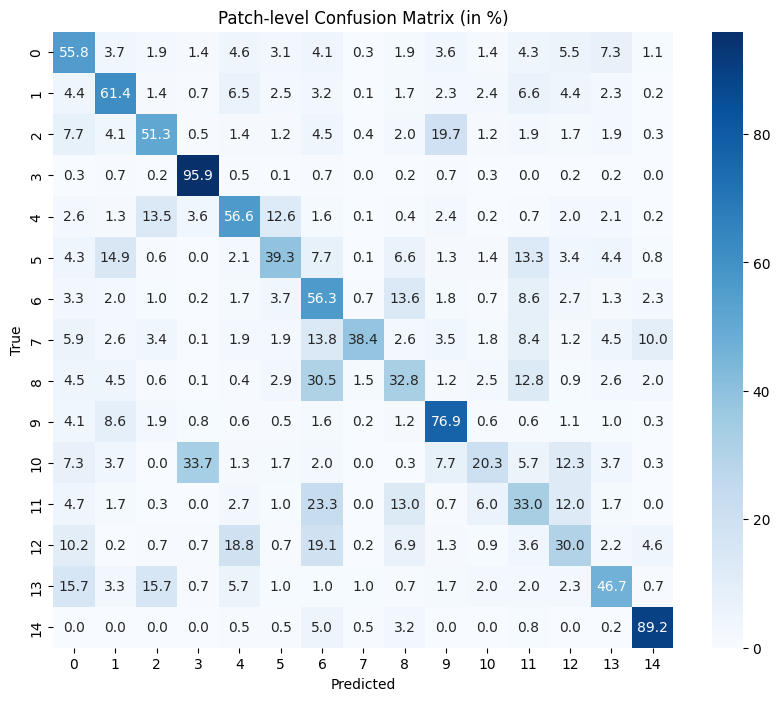

Slide-level Accuracy: 0.7556

Slide-level Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       374
           1       0.79      0.78      0.79        79
           2       0.89      0.68      0.77        82
           3       0.91      1.00      0.95        29
           4       0.38      0.79      0.51        14
           5       0.50      0.61      0.55        18
           6       0.68      0.87      0.77        47
           7       1.00      0.60      0.75        57
           8       0.60      0.47      0.53        19
           9       0.74      0.87      0.80       102
          10       0.20      0.33      0.25         3
          11       0.03      0.33      0.06         3
          12       0.11      0.33      0.16         9
          13       0.09      0.67      0.16         3
          14       0.33      1.00      0.50         4

    accuracy                           0.76       843
   macro avg  

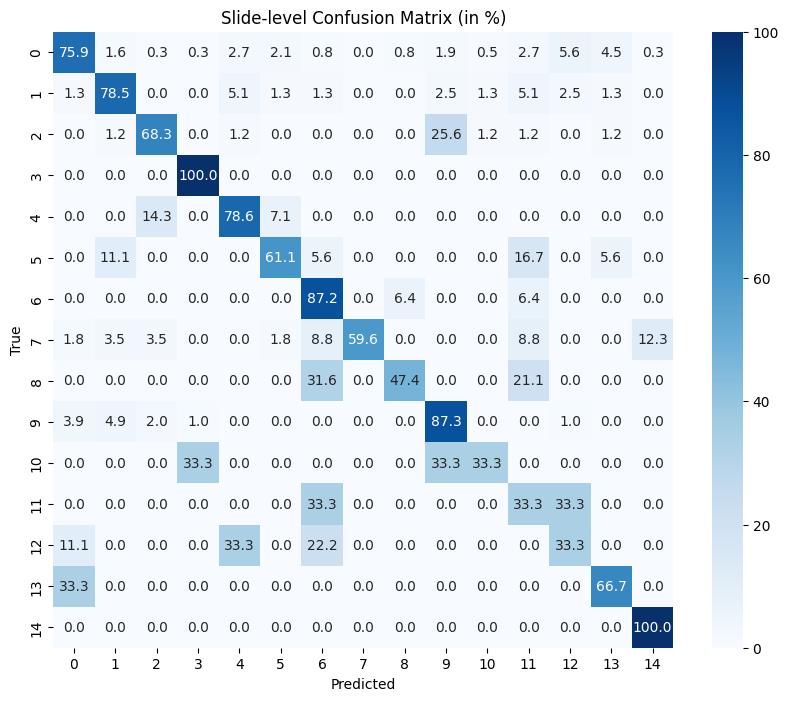

In [51]:
# test_loss /= len(test_loader.dataset)
# test_acc = test_corrects.double() / len(test_loader.dataset)

# print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# Patch-level Classification Report and Confusion Matrix
print("\nPatch-level Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)]))

cm_patch = confusion_matrix(all_labels, all_preds)
cm_patch_percentage = cm_patch.astype('float') / cm_patch.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cm_patch_percentage, annot=True, fmt='.1f', cmap='Blues', xticklabels=[str(i) for i in range(num_classes)], yticklabels=[str(i) for i in range(num_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Patch-level Confusion Matrix (in %)')
plt.show()



# Generate slide-level predictions
slide_preds = {}
for slide_id, preds in slide_predictions.items():
    # Majority vote or averaging probabilities can be used
    slide_preds[slide_id] = Counter(preds).most_common(1)[0][0]  # Majority vote

# Prepare slide-level true labels and predictions for evaluation
slide_true_labels = [label for slide_id, label in slide_labels.items()]
slide_pred_labels = [pred for slide_id, pred in slide_preds.items()]

# Calculate slide-level accuracy
slide_corrects = sum([1 if pred == true else 0 for pred, true in zip(slide_pred_labels, slide_true_labels)])
slide_accuracy = slide_corrects / len(slide_true_labels)

print(f"Slide-level Accuracy: {slide_accuracy:.4f}")

# Slide-level Classification Report and Confusion Matrix
print("\nSlide-level Classification Report:\n")
print(classification_report(slide_true_labels, slide_pred_labels, target_names=[str(i) for i in range(num_classes)]))

cm_slide = confusion_matrix(slide_true_labels, slide_pred_labels)
cm_slide_percentage = cm_slide.astype('float') / cm_slide.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cm_slide_percentage, annot=True, fmt='.1f', cmap='Blues', xticklabels=[str(i) for i in range(num_classes)], yticklabels=[str(i) for i in range(num_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Slide-level Confusion Matrix (in %)')
plt.show()

